Discourse-semantics of *risk* in the *New York Times*, 1963&ndash;2014
==========================================

**[Jens Zinn](mailto:jzinn@unimelb.edu.au?Subject=IPython%20NYT%20risk%20project), [Daniel McDonald](mailto:mcdonaldd@unimelb.edu.au?Subject=IPython%20NYT%20risk%20project)**
--------------------------

<br>

> **SUMMARY:** This *IPython Notebook* demonstrates the findings from our investigation of *risk* in the NYT, as well as the code used to generate these findings. If you have the necessary dependencies installed, you can also use this notebook to interrogate and visualise the corpus yourself. 

### Setup

If you haven't already done so, the first things we need to do are **install corpkit**, download data for NLTK's tokeniser, and **unzip our corpus**.

In [ ]:
# install corpkit with either pip or easy_install
try:
    import pip
    pip.main(['install', 'corpkit'])
except ImportError:
    import easy_install
    easy_install.main(["-U","corpkit"])

In [ ]:
# download nltk tokeniser data
import nltk
nltk.download('punkt')
nltk.download('wordnet')

In [ ]:
# unzip and untar our data
! gzip -dc data/nyt.tar.gz | tar -xf - -C data

Great! Now we have everything we need to start.

### Orientation

 Let's import the functions we'll be using to investigate the corpus. These functions are designed for this interrogation, but also have more general use in mind, so you can likely use them on your own corpora.

| **Function name** | Purpose                            | |
| ----------------- | ---------------------------------- | |
| `interrogator()`  | interrogate parsed corpora         | |
| `editor()`        | edit `interrogator()` results         | |
| `plotter()`       | visualise `interrogator()` results | |
| `quickview()`     | view `interrogator()` results      | |
| `conc()`          | complex concordancing of subcorpora | |
| `keywords()`          | get keywords and ngrams from `conc()` output | |
| `collocates()`          | get collocates from `conc()` output| |
| `quicktree()`          | visually represent a parse tree | |
| `searchtree()`          | search a parse tree with a Tregex query | |

In [1]:
import corpkit
import pandas as pd
from corpkit import (interrogator, editor, plotter, quickview, 
                    conc, keywords, colls, save_result, load_result)
# show figures in browser
% matplotlib inline

Next, let's set the path to our corpus. If you were using this interface for your own corpora, you would change this to the path to your data.

In [2]:
# corpus of every article, with annual subcorpora
annual_trees = 'data/nyt/years' 

Let's also quickly set some options for displaying raw data:

In [3]:
pd.set_option('display.max_columns', 10)
pd.set_option('max_colwidth',70)
pd.set_option('display.width', 1000)
pd.set_option('expand_frame_repr', False)
pd.set_option('colheader_justify', 'left')

### The report

The focus of this notebook is our methodology and findings. These parts of the project are contextualised and elaborated upon in our written report of the project. Depending on your browser's capabilities/settings, the following will download or display our report:

In [ ]:
# from corpkit import report_display
# report_display()

### The data

Our main corpus is comprised of paragraphs from *New York Times* articles that contain a risk word, which we have defined by regular expression as '(?i)'.?\brisk.?\b'. This includes *low-risk*, or *risk/reward* as single tokens, but excludes *brisk* or *asterisk*.

The data comes from a number of sources.

* 1963 editions were downloaded from ProQuest Newsstand as PDFs. Optical character recognition and manual processing was used to create a set of 1200 risk sentences.
* The 1987&ndash;2006 editions were taken from the *NYT Annotated Corpus*.
* 2007&ndash;2014 editions were downloaded from *ProQuest Newsstand* as HTML.

In total, 149,504 documents were processed. The corpus from which the risk corpus was made is over 150 million words in length!

The texts have been parsed for part of speech and grammatical structure by [`Stanford CoreNLP*](http://nlp.stanford.edu/software/corenlp.shtml). In this Notebook, we are only working with the parsed versions of the texts. We rely on [*Tregex*](http://nlp.stanford.edu/~manning/courses/ling289/Tregex.html) to interrogate the corpora. Tregex allows very complex searching of parsed trees, in combination with [Java Regular Expressions](http://docs.oracle.com/javase/7/docs/api/java/util/regex/Pattern.html). It's definitely worthwhile to learn the Tregex syntax, but in case you're time-poor, at the end of this notebook are a series of Tregex queries that you can copy and paste into *interrogator()` and `conc()` queries.

### Interrogating the corpus

So, let's start by finding out how many words we have in each subcorpus. To do this, we'll interrogate the corpus using `interrogator()`. Its most important arguments are:

1. **path to corpus**

2. Tregex **options**:
  * **'t/w/words'**: return only words
  * **'c/count'**: return a count of matches
  * **'p/pos'**: return only the tag
  * **'b/both'**: return tag and word together

3. a **Tregex query**

We only need to count tokens, so we can use the `'count'` option (it's often faster than getting lists of matching tokens). The cell below will run `interrogator()` over each annual subcorpus and count the number of matches for the query.

Some common Tregex patterns have been predefined. Searching for `'any'` will find any word in the corpus and count it.

In [4]:
allwords = interrogator(annual_trees, 'count', 'any') 

When the interrogation has finished, we can view our results:

In [5]:
# from the allwords results, print the totals
print allwords.totals

1963      83325
1987     481830
1988     450872
1989     473741
1990     443712
1991     397694
1992     402754
1993     412920
1994     458677
1995     475672
1996     413403
1997     402636
1998     468697
1999     467253
2000     481373
2001     619282
2002    1113704
2003    1086152
2004    1101260
2005    1094586
2006    1048182
2007     906510
2008     992004
2009     944752
2010    1011854
2011    1090474
2012     995546
2013     978308
2014     623268
Name: Total, dtype: int64


If you want to see the query and options that created the results, you can use:

In [6]:
print allwords.query

['data/nyt/years', '/.?[A-Za-z0-9].?/ !< __', 'C']


### Plotting results

Lists of years and totals are pretty dry. Luckily, we can use the `plotter()` function to visualise our results. At minimum, `plotter()` needs two arguments:

1. a title (in quotation marks)
2. a list of results to plot

/Library/Python/2.7/site-packages/matplotlib/figure.py:387: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


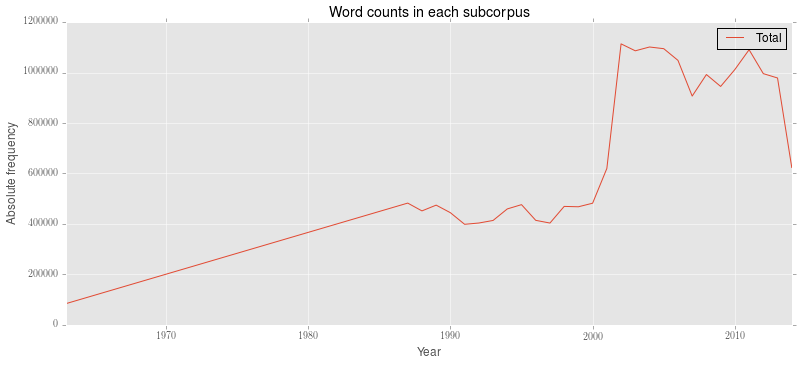

In [7]:
plotter('Word counts in each subcorpus', allwords.totals)

Because we have smaller samples for 1963 and 2014, we might want to project them. To do that, we can pass subcorpus names and projection values to `editor()`:

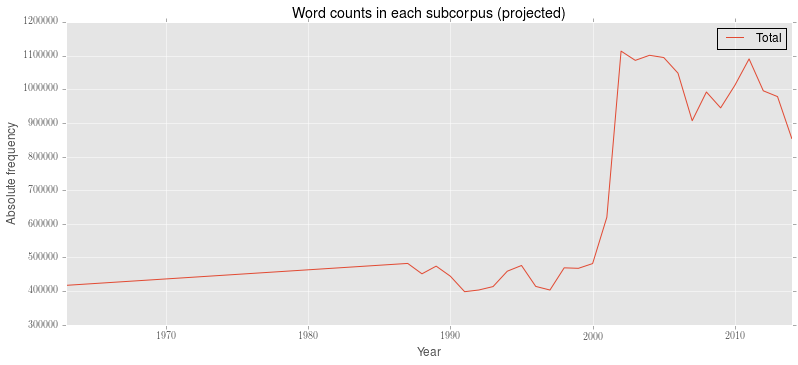

In [8]:
proj_vals = [(1963, 5), (2014, 1.37)]
projected = editor(allwords.totals, projection = proj_vals)
plotter('Word counts in each subcorpus (projected)', projected.totals)

Great! So, we can see that the number of words per year varies quite a lot, even after projection. That's worth keeping in mind.

### Frequency of risk words in the NYT

Next, let's count the total number of risk words. Notice that we are using the `'both'` flag, instead of the `'count'` flag, because we want both the word and its tag.

In [9]:
# our query:
riskwords_query = r'__ < /(?i).?\brisk.?\b/' # any risk word and its word class/part of speech
# get all risk words and their tags :
riskwords = interrogator(annual_trees, 'both', riskwords_query)

 10:54:25: Finished! 565 unique results, 356542 total.


Even when do not use the `count` flag, we can access the total number of matches as before:

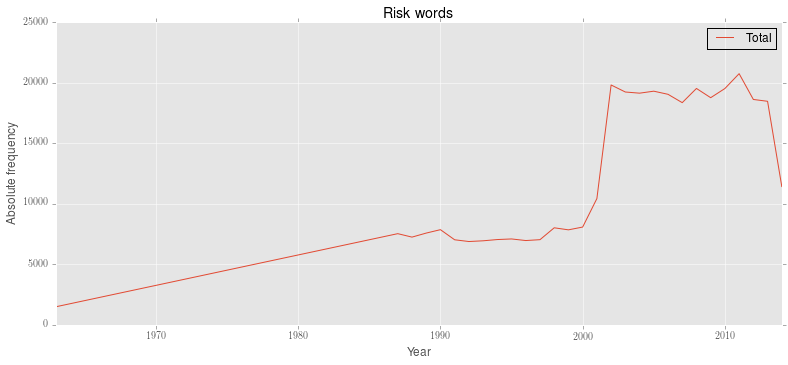

In [10]:
plotter('Risk words', riskwords.totals)

At the moment, it's hard to tell whether or not these counts are simply because our annual NYT samples are different sizes. To account for this, we can calculate the percentage of parsed words that are risk words. This means combining the two interrogations we have already performed.

We can do this by using `editor()`:

In [11]:
rel_riskwords = editor(riskwords.totals, '%', allwords.totals)

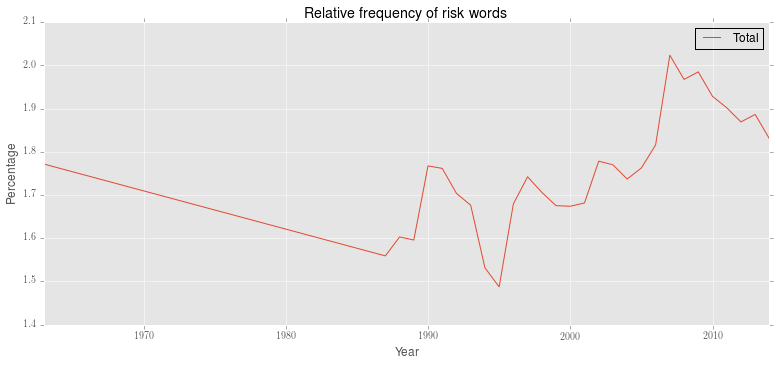

In [12]:
plotter('Relative frequency of risk words', rel_riskwords.totals)

That's more helpful. We can now see some interesting peaks and troughs in the proportion of risk words. We can also see that 1963 contains the highest proportion of risk words. This is because the manual corrector of 1963 OCR entries preserved only the sentence containing risk words, rather than the paragraph.

Here are two methods for excluding 1963 from the chart:

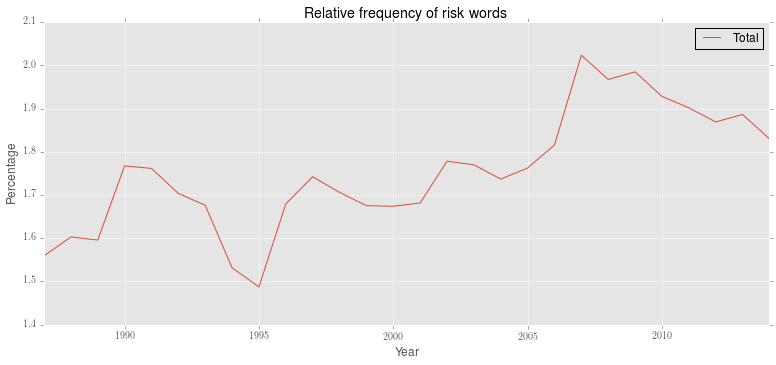

In [13]:
# using Pandas syntax:
plotter('Relative frequency of risk words', rel_riskwords.totals.drop('1963'))

Skipping 1 subcorpora:
    1963




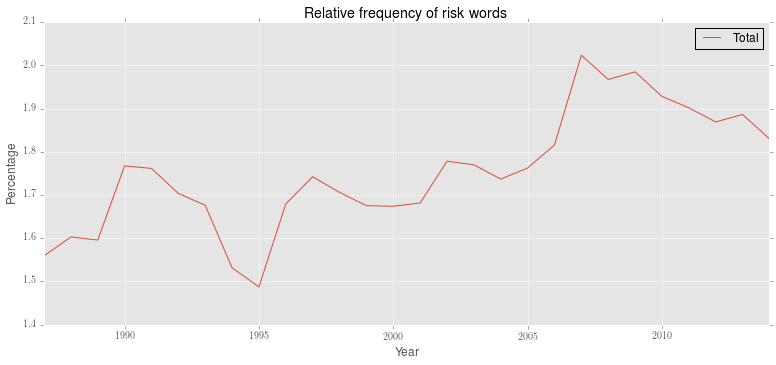

In [14]:
rel_riskwords = editor(rel_riskwords.totals, skip_subcorpora = [1963])
plotter('Relative frequency of risk words', rel_riskwords.totals)

Perhaps we're interested in not only the frequency of risk words, but the frequency of different *kinds* of risk words. We actually already collected this data during our last `interrogator()` query.

We can print just the first few entries of the results list, rather than the totals list.

In [15]:
# using Pandas syntax:
riskwords.results.T.head(n = 10)

,1963,1987,...,2013,2014
(nn risk),740,4116,...,10952,6790
(nns risks),404,1612,...,4038,2614
...,...,...,...,...,...
(nnp risk),11,29,...,86,46
(jj low-risk),1,43,...,106,84


In [16]:
# using quickview
from corpkit import quickview
quickview(riskwords.results)

  0: (nn risk) (n=204305)
  1: (nns risks) (n=76105)
  2: (jj risky) (n=22134)
  3: (vb risk) (n=19621)
  4: (jj high-risk) (n=7951)
  5: (vbp risk) (n=4294)
  6: (vbz risks) (n=3414)
  7: (nn risk-taking) (n=2204)
  8: (nnp risk) (n=1843)
  9: (jj low-risk) (n=1657)
 10: (jj at-risk) (n=1498)
 11: (jj risk-free) (n=1347)
 12: (jj risk-averse) (n=1258)
 13: (jj risk-taking) (n=1242)
 14: (nnp risky) (n=1198)
 15: (nns risk-takers) (n=429)
 16: (jj risk-based) (n=361)
 17: (jj higher-risk) (n=337)
 18: (jj risk-management) (n=324)
 19: (nn risk-taker) (n=319)
 20: (jj risk-adjusted) (n=256)
 21: (jj risk-reward) (n=240)
 22: (jj risk-weighted) (n=186)
 23: (nn risk-management) (n=181)
 24: (jj risk-benefit) (n=151)


We now have enough data to do some serious plotting.

In [17]:
frac1 = editor(riskwords.results, '%', riskwords.totals)

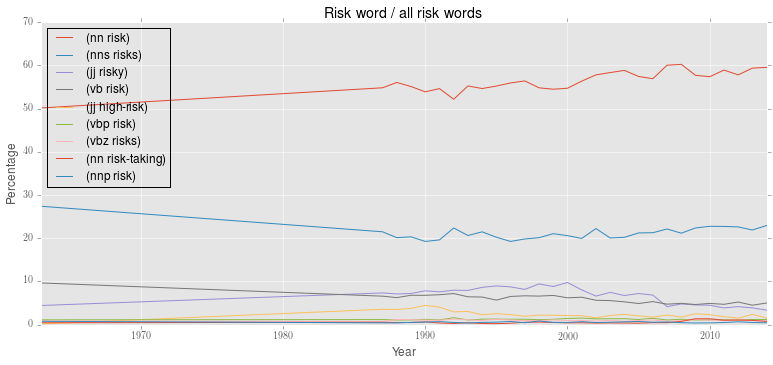

In [18]:
plotter('Risk word / all risk words', frac1.results, num_to_plot = 9)

In [19]:
frac2 = editor(riskwords.results, '%', allwords.totals)

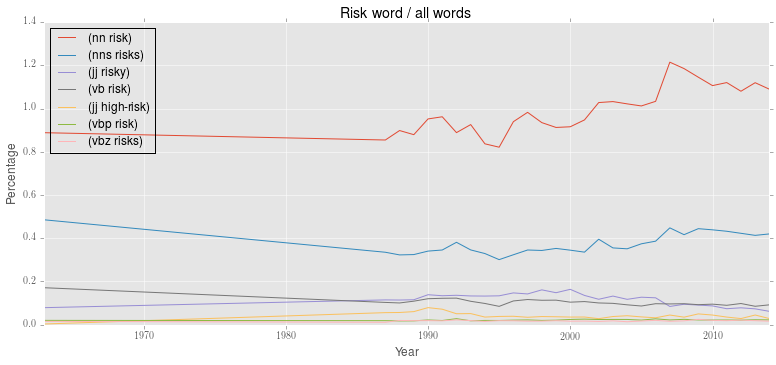

In [20]:
plotter('Risk word / all words', frac2.results)

Another neat feature is the `.table` attribute of interrogations, which shows the most common `n` results in each subcorpus:

In [21]:
riskwords.table

,1963,1987,...,2013,2014
0,(nn risk),(nn risk),...,(nn risk),(nn risk)
1,(nns risks),(nns risks),...,(nns risks),(nns risks)
...,...,...,...,...,...
48,,(nn risk-management),...,(jj risk-on),(jj risk-damping)
49,,(nn political-risk),...,(jj risk-style),(jj zero-risk)


### Customising visualisations

By default, `plotter()` plots the seven most frequent results, including 1963.

 We can use other `plotter()` arguments to customise what our chart shows. `plotter()`'s possible arguments are:

 | `plotter()` argument | Mandatory/default?       |  Use          | Type  |
 | :------|:------- |:-------------|:-----|
 | *title* | **mandatory**      | A title for your plot | string |
 | `results* | **mandatory**      | the results you want to plot | *interrogator()` total |
 | *x_label* | False    | custom label for the x-axis     |  string |
 | *y_label* | False    | custom label for the y-axis     |  string |
 | figsize | False | set the size of the figure | tuple `(length, width)`|
 | tex | False | use TeX to generate image text | boolean |
 | style | `'ggplot'` | use Matplotlib styles | str: 'dark_background', 'bmh', 'grayscale', 'ggplot', 'fivethirtyeight', 'matplotlib' |
 | legend | `'default'` | legend position | str: 'right' to move legend outside chart |

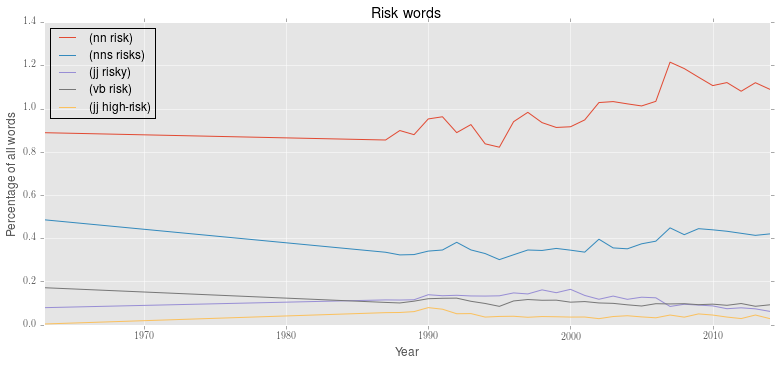

In [22]:
plotter('Risk words', frac2.results, num_to_plot = 5, y_label = 'Percentage of all words')

Keyword arguments for Pandas and matplotlib can also be used:

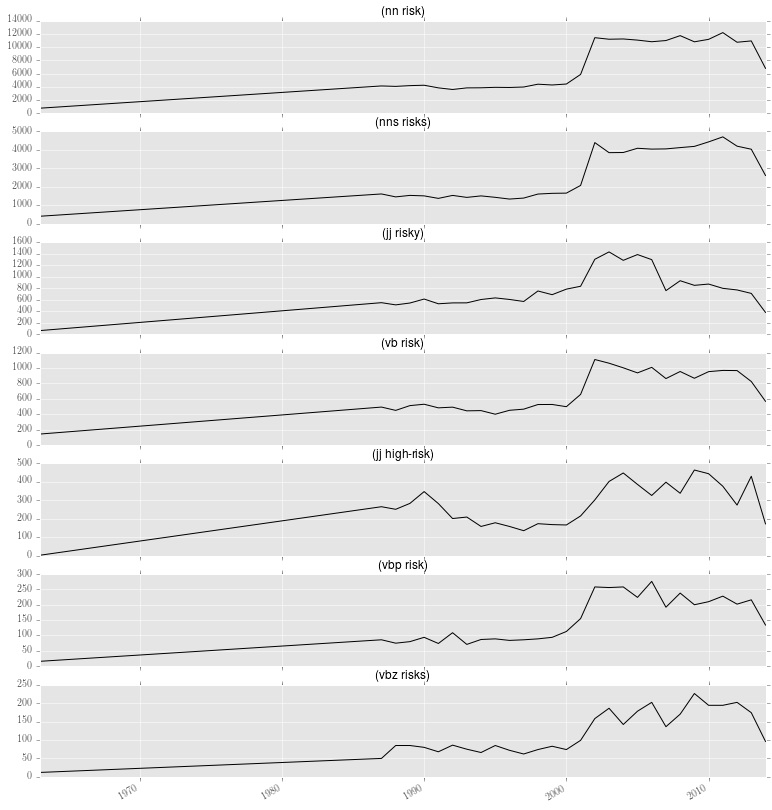

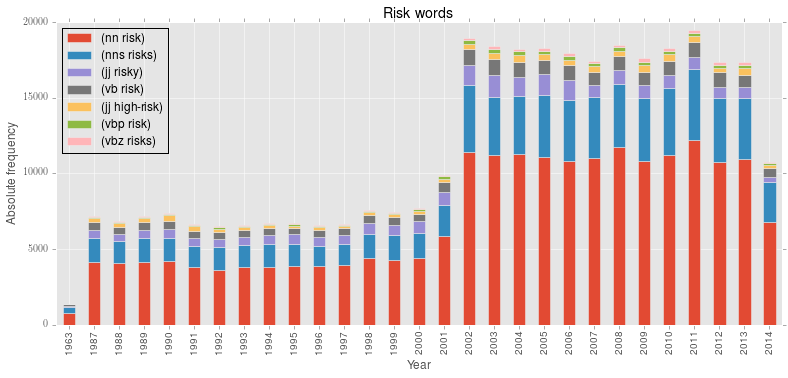

In [23]:
plotter('Risk words', riskwords.results, subplots = True)
plotter('Risk words', riskwords.results, kind = 'bar', stacked = True)

Another neat thing you can do is save the results of an interrogation, so they don't have to be run the next time you load this notebook:

In [24]:
# specify what to save, and a name for the file.
from corpkit import save_result, load_result
save_result(allwords, 'allwords')

You can then load these results:

In [25]:
fromfile_allwords = load_result('allwords')
fromfile_allwords.totals

1963    83325
...
2014    623268
Name: Total, Length: 29, dtype: int64

### `quickview()`

`quickview()` is a function that quickly shows the n most frequent items in a list. Its arguments are:

1. an `interrogator()` result
2. number of results to show (default = 50)

In [26]:
from corpkit import quickview
quickview(riskwords.results, n = 25)

  0: (nn risk) (n=204305)
  1: (nns risks) (n=76105)
  2: (jj risky) (n=22134)
  3: (vb risk) (n=19621)
  4: (jj high-risk) (n=7951)
  5: (vbp risk) (n=4294)
  6: (vbz risks) (n=3414)
  7: (nn risk-taking) (n=2204)
  8: (nnp risk) (n=1843)
  9: (jj low-risk) (n=1657)
 10: (jj at-risk) (n=1498)
 11: (jj risk-free) (n=1347)
 12: (jj risk-averse) (n=1258)
 13: (jj risk-taking) (n=1242)
 14: (nnp risky) (n=1198)
 15: (nns risk-takers) (n=429)
 16: (jj risk-based) (n=361)
 17: (jj higher-risk) (n=337)
 18: (jj risk-management) (n=324)
 19: (nn risk-taker) (n=319)
 20: (jj risk-adjusted) (n=256)
 21: (jj risk-reward) (n=240)
 22: (jj risk-weighted) (n=186)
 23: (nn risk-management) (n=181)
 24: (jj risk-benefit) (n=151)


The number shown next to the item is its index. You can use this number to refer to an entry when editing results.

### `editor()`

Results lists can be edited quickly with `editor()`. It has a lot of different options.

First, we can select specific subcorpora to keep, remove or span:

In [27]:
editor(riskwords.results, skip_subcorpora = [1963, 1987, 1988]).results

Skipping 3 subcorpora:
    1963
    1987
    1988




,(nn risk),(nns risks),...,(nn risk-hedging),(cd 410-risk)
1989,4164,1534,...,0,0
1990,4223,1508,...,0,0
...,...,...,...,...,...
2013,10952,4038,...,0,0
2014,6790,2614,...,0,0


In [28]:
editor(riskwords.results, just_subcorpora = [1963, 1987, 1988]).results

Keeping 3 subcorpora:
    1963
    1987
    1988




,(nn risk),(nns risks),...,(nn risk-hedging),(cd 410-risk)
1963,740,404,...,0,1
1987,4116,1612,...,0,0
1988,4049,1453,...,1,0


In [29]:
editor(riskwords.results, span_subcorpora = [2000, 2010]).results

Keeping subcorpora:
    2000--2010



,(nn risk),(nns risks),...,(nn risk-hedging),(cd 410-risk)
2000,4407,1657,...,0,0
2001,5866,2075,...,0,0
...,...,...,...,...,...
2009,10818,4192,...,0,0
2010,11192,4436,...,0,0


We can do similar kinds of things with each *result*:

In [30]:
quickview(riskwords.results)

  0: (nn risk) (n=204305)
  1: (nns risks) (n=76105)
  2: (jj risky) (n=22134)
  3: (vb risk) (n=19621)
  4: (jj high-risk) (n=7951)
  5: (vbp risk) (n=4294)
  6: (vbz risks) (n=3414)
  7: (nn risk-taking) (n=2204)
  8: (nnp risk) (n=1843)
  9: (jj low-risk) (n=1657)
 10: (jj at-risk) (n=1498)
 11: (jj risk-free) (n=1347)
 12: (jj risk-averse) (n=1258)
 13: (jj risk-taking) (n=1242)
 14: (nnp risky) (n=1198)
 15: (nns risk-takers) (n=429)
 16: (jj risk-based) (n=361)
 17: (jj higher-risk) (n=337)
 18: (jj risk-management) (n=324)
 19: (nn risk-taker) (n=319)
 20: (jj risk-adjusted) (n=256)
 21: (jj risk-reward) (n=240)
 22: (jj risk-weighted) (n=186)
 23: (nn risk-management) (n=181)
 24: (jj risk-benefit) (n=151)


In [31]:
editor(riskwords.results, skip_entries = [2, 5, 6]).results

Skipping 3 entries:
    (jj risky)
    (vbp risk)
    (vbz risks)




,(nn risk),(nns risks),...,(nn risk-hedging),(cd 410-risk)
1963,740,404,...,0,1
1987,4116,1612,...,0,0
...,...,...,...,...,...
2013,10952,4038,...,0,0
2014,6790,2614,...,0,0


In [32]:
editor(riskwords.results, just_entries = [2, 5, 6]).results

Keeping 3 entries:
    (jj risky)
    (vbp risk)
    (vbz risks)




,(jj risky),(vbp risk),(vbz risks)
1963,65,16,12
1987,549,86,50
...,...,...,...
2013,710,216,174
2014,380,134,96


We can also use the words themselves, rather than indices, for all of these operations:

In [33]:
editor(riskwords.results, just_entries = ['(nn risk-management)', '(jj risk-management)']).results

Keeping 2 entries:
    (nn risk-management)
    (jj risk-management)




,(jj risk-management),(nn risk-management)
1963,0,0
1987,2,1
...,...,...
2013,20,0
2014,20,6


Or, we can use Regular Expressions:

In [34]:
# skip any verbal risk
editor(riskwords.results, skip_entries = r'^\(v').results

Skipping 15 entries:
    (vb risk)
    (vbp risk)
    (vbz risks)
    (vb de-risk)
    (vbg risk-taking)
    (vbz de-risks)
    (vbd risk-minded)
    (vb risk-manage)
    (vb at-risk)
    (vbd risks-be-damned)
    (vbg risk-reducing)
    (vbd risk/reward)
    (vbp de-risk)
    (vbg risk-sharing)
    (vbg risk-adjusting)




,(nn risk),(nns risks),...,(nn risk-hedging),(cd 410-risk)
1963,740,404,...,0,1
1987,4116,1612,...,0,0
...,...,...,...,...,...
2013,10952,4038,...,0,0
2014,6790,2614,...,0,0


We can also merge entries, and specify a new name for the merged items. In lieu of a name, we can pass an index. 

In [35]:
editor(riskwords.results, merge_entries = [2, 5, 6], newname = 'New name').results

Merging 3 entries as "New name":
    (jj risky)
    (vbp risk)
    (vbz risks)




,(nn risk),(nns risks),...,(cd 410-risk),New name
1963,740,404,...,1,93
1987,4116,1612,...,0,685
...,...,...,...,...,...
2013,10952,4038,...,0,1100
2014,6790,2614,...,0,610


In [36]:
editor(riskwords.results, merge_entries = ['(nns risks)', '(nns risk-takers)', '(nns risks)'], newname = 1).results

Merging 3 entries as "(nns risks)":
    (nns risks)
    (nns risk-takers)
    (nns risks)




,(nn risk),(jj risky),...,(cd 410-risk),(nns risks)
1963,740,65,...,1,809
1987,4116,549,...,0,3230
...,...,...,...,...,...
2013,10952,710,...,0,8108
2014,6790,380,...,0,5260


Notice how the merged result appears as the final column. To reorder the columns by total frequency, we can use `sort_by = 'total'`.

In [37]:
# if we don't specify a new name, editor makes one for us
generated_name = editor(riskwords.results, merge_entries = [2, 5, 6], sort_by = 'total')
quickview(generated_name.results)

Merging 3 entries as "(jj risky)/(vbp risk)/(vbz risks)...":
    (jj risky)
    (vbp risk)
    (vbz risks)


  0: (nn risk) (n=204305)
  1: (nns risks) (n=76105)
  2: (jj risky)/(vbp risk)/(vbz risks)... (n=29842)
  3: (vb risk) (n=19621)
  4: (jj high-risk) (n=7951)
  5: (nn risk-taking) (n=2204)
  6: (nnp risk) (n=1843)
  7: (jj low-risk) (n=1657)
  8: (jj at-risk) (n=1498)
  9: (jj risk-free) (n=1347)
 10: (jj risk-averse) (n=1258)
 11: (jj risk-taking) (n=1242)
 12: (nnp risky) (n=1198)
 13: (nns risk-takers) (n=429)
 14: (jj risk-based) (n=361)
 15: (jj higher-risk) (n=337)
 16: (jj risk-management) (n=324)
 17: (nn risk-taker) (n=319)
 18: (jj risk-adjusted) (n=256)
 19: (jj risk-reward) (n=240)
 20: (jj risk-weighted) (n=186)
 21: (nn risk-management) (n=181)
 22: (jj risk-benefit) (n=151)
 23: (jj no-risk) (n=151)
 24: (jj highest-risk) (n=148)


`editor()` can sort also sort alphabetically, or by least frequent:

In [38]:
# alphabetically
editor(riskwords.results, sort_by = 'name').results

,(cd 410-risk),(cd no-risk),...,(x risk),(x risko)
1963,1,4,...,0,0
1987,0,0,...,0,0
...,...,...,...,...,...
2013,0,0,...,0,0
2014,0,0,...,0,0


In [39]:
# least frequent
editor(riskwords.results, sort_by = 'infreq').results

,(nn risk-hedging),(nns risk-technologies),...,(nns risks),(nn risk)
1963,0,0,...,404,740
1987,0,0,...,1612,4116
...,...,...,...,...,...
2013,0,0,...,4038,10952
2014,0,0,...,2614,6790


Particularly cool is sorting by 'increase' or 'decrease': this calculates the trend lines of each result, and sort by the slope.

In [40]:
editor(riskwords.results, sort_by = 'increase').results

,(nn risk),(nns risks),...,(jj assigned-risk),(nnp no-risk)
1963,740,404,...,0,10
1987,4116,1612,...,0,1
...,...,...,...,...,...
2013,10952,4038,...,0,0
2014,6790,2614,...,0,0


We can use `just_totals` to output just the sum of occurrences in each subcorpus:

In [41]:
editor(riskwords.results, just_totals = True).results

(nn risk)    204305
...
(cd 410-risk)    1
Length: 565, dtype: int64

A handy thing about working with Pandas DataFrames is that we can easily translate our results to other formats:

In [42]:
increasing = editor(riskwords.results, sort_by = 'decrease')

In [43]:
# tranpose with T, get just top 5 results, print as CSV
print increasing.results.T.head().to_csv()

,1963,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
(nnp no-risk),10.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
(jj assigned-risk),0.0,0.0,7.0,7.0,13.0,4.0,5.0,2.0,5.0,2.0,0.0,3.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
(jj standard-risk),7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
(nn event-risk),0.0,0.0,2.0,11.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
(nnp preferred-risk),5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0



In [44]:
# or, print to latex markup:
print increasing.results.T.head().to_latex()

\begin{tabular}{lrrrrrrrrrrrrrrrrrrrrrrrrrrrrr}
\toprule
{} &  1963 &  1987 &  1988 &  1989 &  1990 &  1991 &  1992 &  1993 &  1994 &  1995 &  1996 &  1997 &  1998 &  1999 &  2000 &  2001 &  2002 &  2003 &  2004 &  2005 &  2006 &  2007 &  2008 &  2009 &  2010 &  2011 &  2012 &  2013 &  2014 \\
\midrule
(nnp no-risk)        &  10   &  1    &  1    &   1   &   0   &  1    &  1    &  0    &  1    &  0    &  0    &  1    &  1    &  0    &  0    &  0    &  2    &  0    &  2    &  0    &  0    &  0    &  0    &  0    &  0    &  0    &  0    &  0    &  0    \\
(jj assigned-risk)   &   0   &  0    &  7    &   7   &  13   &  4    &  5    &  2    &  5    &  2    &  0    &  3    &  0    &  0    &  0    &  0    &  2    &  0    &  0    &  4    &  0    &  0    &  0    &  0    &  0    &  0    &  0    &  0    &  0    \\
(jj standard-risk)   &   7   &  0    &  0    &   0   &   0   &  0    &  0    &  0    &  0    &  0    &  0    &  0    &  0    &  0    &  0    &  0    &  0    &  0    &  0    &  0    &  

Of course, you can perform many of these operations at the same time. Problems may arise, however, especially if your options contradict.

In [47]:
editor(riskwords.results, '%', riskwords.totals, span_subcorpora = [1990, 2000], just_entries = r'^\(n', merge_entries = r'(nns|nnp)', newname = 'Plural/proper').results

Merging 72 entries as "Plural/proper":
    (nns risks)
    (nnp risk)
    (nnp risky)
    (nns risk-takers)
    (nnp high-risk)
    (nnp riske)
    (nnp risko)
    (nnp riska)
    (nnp at-risk)
    (nnp low-risk)
    (nnp no-risk)
    (nnp risk-taking)
    (nnp risk/reward)
    (nnps risk-takers)
    (nnp risks)
    (nnp risk-taker)
    (nnp risk-averse)
    (nnp inter-risk)
    (nnp risku)
    (nnp klein-riske)

... and 52 more ... 

Keeping 146 entries:
    (nn risk)
    (nn risk-taking)
    (nn risk-taker)
    (nn risk-management)
    (nn risk-assessment)
    (nn political-risk)
    (nn at-risk)
    (nn risk-reduction)
    (nn value-at-risk)
    (nn risk-aversion)
    (nn risk-weighting)
    (nn risk-on)
    (nn risk-reward)
    (nn risk-sharing)
    (nn event-risk)
    (nn risk/reward)
    (nn less-risky)
    (nn risk-retention)
    (nn risk-arbitrage)
    (nn risk-benefit)

... and 126 more ... 

Keeping subcorpora:
    1990--2000



,(nn risk),(nn risk-taking),...,(nn risk-gd),(nn risk-hedging)
1990,53.857926,0.612167,...,0,0
1991,54.603854,0.356888,...,0,0
...,...,...,...,...,...
1999,54.465312,0.472723,...,0,0
2000,54.697778,0.384759,...,0,0


### Diversity of risk words

It's important to note that the kind of results we generate are hackable. We could count the number of unique risk words in each subcorpus by changing any count over 1 to 1.

In [48]:
import numpy as np
# copy our list
uniques = riskwords.results.copy()
# divide every result by itself
for f in uniques:
    uniques[f] = uniques[f] / uniques[f]
# get rid of inf scores (i.e. 0 / 0) using numpy
uniques = uniques.replace(np.inf, 0)
# sum the results
u = uniques.T.sum()
# give our data a name
u.name = 'Unique risk words'

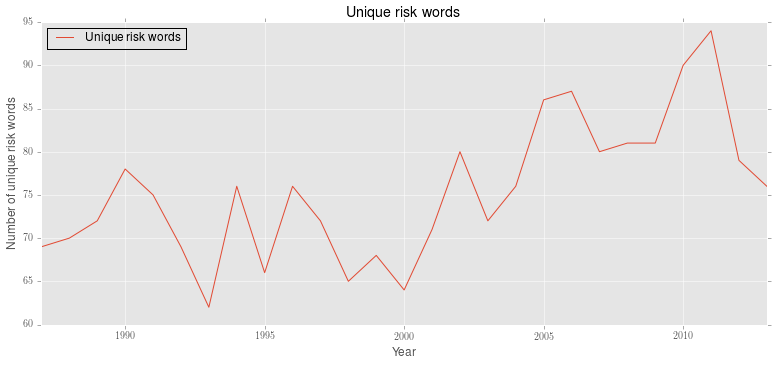

In [49]:
plotter('Unique risk words', u.drop(['1963', '2014']), y_label = 'Number of unique risk words')

So, we can see a generally upward trajectory, with more risk words constantly being used. Many of these results appear once, however, and many are nonwords. *Can you figure out how to remove words that appear only once per year?*

### conc()

`conc()` produces concordances of a subcorpus based on a Tregex query. Its main arguments are:

1. A subcorpus to search *(remember to put it in quotation marks!)*
2. A Tregex query

In [50]:
# here, we use a subcorpus of politics articles,
# rather than the total annual editions.
lines = conc('data/nyt/topics/politics/1999', r'/JJ.?/ << /(?i).?\brisk.?\b/') # adj containing a risk word


11:14:00: Getting concordances for data/nyt/topics/politics/1999 ... 
          Query: /JJ.?/ << /(?i).?\brisk.?\b/

0          , Mr. Wahid seems to be playing a       risky   game of free-rein leadership            
1     after making disastrous investments in       risky   securities , has a lower rating among   
2                         That was the least       risky   course but one that left the initiative 
3     A party-line vote on witnesses is more       risky   politically for Republicans than        
4     decision to fire General Musharraf was       risky   ; in Pakistan , generals have ruled for 
5                                   It was a       risky   strategy , but Mr. Lee apparently       
6                 As Indonesia undergoes its       risky   on-the-job training in democracy in the 
7     -- said creative legal arguments and a       risky   strategy of challenging some facts in   
8   electoral setbacks produced increasingly       risky   financial decisions by 

You can set `conc()` to print only the first ten examples with `n = 10`, or ten random these with the `n = 15, random = True` parameter.

In [52]:
lines = conc('data/nyt/years/2007', r'/VB.?/ < /(?i).?\brisk.?\b/', n = 15, random = True)


11:14:20: Getting concordances for data/nyt/years/2007 ... 
          Query: /VB.?/ < /(?i).?\brisk.?\b/

0       companies know they have to adapt or    risk   being left behind                       
1           is to put off the inevitable and    risk   a series of trade wars                  
2      numbers , employers must fire them or    risk   prosecution                             
3                                      I now    risk   anything to stumble down poison-ivy-    
4         we planned a wedding , rather than    risk   never having the chance                 
5   Canada may be regarded a misfortune ; to    risk   millions more by doing it again in      
6     and say , ` O.K. , now we are going to    risk   our lives to save some people           
7        remains : Why would anybody want to    risk   corked wines                            
8   on the question of staggered boards , we    risk   further short-termism in boardrooms and 
9    Iraqis may well ask why 

`conc()` takes another argument, window, which alters the amount of co-text appearing either side of the match. The default is 50 characters

In [53]:
lines = conc('data/nyt/topics/health/2013', r'/VB.?/ << /(?i).?\brisk.?\b/', n = 15, random = True, window = 20)


11:17:13: Getting concordances for data/nyt/topics/health/2013 ... 
          Query: /VB.?/ << /(?i).?\brisk.?\b/

0       like yours would    risk   damaging its        
1     should not have to    risk   their health        
2         , they can not    risk   having their        
3    prolonged pain , to    risk   grave injury and    
4    HealthCare.gov that    risk   the private         
5   what they want , you    risk   reigniting the      
6      warning that they    risk   scrambling hormones 
7         the rights and    risk   the well-being of   
8        what they do or    risk   having cost controls
9   they were willing to    risk   a shutdown over it  
10    you do n't want to    risk   your life on a guess
11   legislators , would    risk   being thwarted yet  
12             This case   risks   doing so            
13        happens , they    risk   a lawsuit like the  
14     changes appear to    risk   pathologizing       


`conc()` also allows you to view parse trees. By default, it's false:

In [54]:
lines = conc('data/nyt/years/2013', r'/VB.?/ < /(?i)\btrad.?/', trees = True)


11:17:19: Getting concordances for data/nyt/years/2013 ... 
          Query: /VB.?/ < /(?i)\btrad.?/

0   ) (PP (IN as) (S (ADVP (RB simply)) (VP   (VBG trading)   (NP (NP (CD one) (NN risk)) (PP (IN for
1   curities)) (SBAR (S (NP (PRP they)) (VP     (VBP trade)   (CC and) (VBP hold))))))))))))) (. .)))
2   S (NP (PRP they)) (VP (VBD started) (NP   (VBG trading)   (NNS options))))))) (. .)))            
3   S (NP (DT a) (JJ German) (NN bank)) (VP    (VBN traded)   (PP (IN in) (NP (NP (NNP New) (NNP York
4   P (WDT which))) (S (NP (NNS banks)) (VP     (VBP trade)   (PP (IN for) (NP (PRP$ their) (JJ own) 
5   NP (NP (DT some) (NNS derivatives)) (VP   (VBG trading)   (PP (IN into) (NP (NP (JJ separate) (NN
6   (S (S (NP (PRP You)) (VP (MD might) (VP      (VB trade)   (NP (DT a) (JJ small)) (PP (CC plus) (P
7   were) (VP (ADVP (RBR more) (RB easily))    (VBN traded)   (PP (IN on) (NP (DT the) (JJ public) (N
8   ) (, ,) (VP (VBP say)))))) (, ,) (S (VP   (VBG trading)   (NP (NNS securities

Just like our other data, conc lines can be edited with `editor()`, or outputted as CSV.

In [55]:
lines = editor(lines, skip_entries = [1, 2, 4, 5])
print lines

   l                                         m              r                                        
0   ) (PP (IN as) (S (ADVP (RB simply)) (VP   (VBG trading)   (NP (NP (CD one) (NN risk)) (PP (IN for
1   S (NP (DT a) (JJ German) (NN bank)) (VP    (VBN traded)   (PP (IN in) (NP (NP (NNP New) (NNP York
..                                       ...            ...                                       ...
34  J open) (NN access)) (S (VP (TO to) (VP      (VB trade)   (PP (IN with) (NP (NP (DT the) (NN Cont
35   (WHNP (WDT that)) (S (VP (VBP are) (VP   (VBG trading)   (PP (IN in) (NP (DT the) (UCP (JJ secon

[36 rows x 3 columns]


If the concordance lines aren't print well, you can use `concprinter()`:

In [56]:
from corpkit import concprinter
concprinter(lines)


0   ) (PP (IN as) (S (ADVP (RB simply)) (VP   (VBG trading)   (NP (NP (CD one) (NN risk)) (PP (IN for
1   S (NP (DT a) (JJ German) (NN bank)) (VP    (VBN traded)   (PP (IN in) (NP (NP (NNP New) (NNP York
2   (S (S (NP (PRP You)) (VP (MD might) (VP      (VB trade)   (NP (DT a) (JJ small)) (PP (CC plus) (P
3   were) (VP (ADVP (RBR more) (RB easily))    (VBN traded)   (PP (IN on) (NP (DT the) (JJ public) (N
4   ) (, ,) (VP (VBP say)))))) (, ,) (S (VP   (VBG trading)   (NP (NNS securities)))) (, ,) (S (VP (T
5        (ROOT (S (NP (NNS Stocks)) (VP (VP    (VBD traded)   (ADJP (RB steadily) (JJR higher)) (PP (
6   )) (SBAR (IN as) (S (NP (PRP they)) (VP    (VBD traded)   (ADJP (JJR higher))))))))))) (, ,) (NP 
7   NP (JJR more) (NNS derivatives)) (S (VP   (VBG trading)   (PRT (IN out)) (PP (IN of) (NP (DT the)
8   NP (PRP We)) (VP (MD will) (RB not) (VP      (VB trade)   (NP (NNP Dwight) (NNP Howard)))) (. .) 
9   shares)) (S (VP (TO to) (VP (VB be) (VP    (VBN traded)   (ADVP (RB here)))))

Or, you can just use Pandas syntax:

In [57]:
# Because there may be commas in the concordance lines, 
# it's better to generate a tab-separated CSV:
print lines.to_csv(sep = '\t')

	l	m	r
0	) (PP (IN as) (S (ADVP (RB simply)) (VP 	(VBG trading)	 (NP (NP (CD one) (NN risk)) (PP (IN for
1	S (NP (DT a) (JJ German) (NN bank)) (VP 	(VBN traded)	 (PP (IN in) (NP (NP (NNP New) (NNP York
2	(S (S (NP (PRP You)) (VP (MD might) (VP 	(VB trade)	 (NP (DT a) (JJ small)) (PP (CC plus) (P
3	were) (VP (ADVP (RBR more) (RB easily)) 	(VBN traded)	 (PP (IN on) (NP (DT the) (JJ public) (N
4	) (, ,) (VP (VBP say)))))) (, ,) (S (VP 	(VBG trading)	 (NP (NNS securities)))) (, ,) (S (VP (T
5	(ROOT (S (NP (NNS Stocks)) (VP (VP 	(VBD traded)	 (ADJP (RB steadily) (JJR higher)) (PP (
6	)) (SBAR (IN as) (S (NP (PRP they)) (VP 	(VBD traded)	 (ADJP (JJR higher))))))))))) (, ,) (NP 
7	NP (JJR more) (NNS derivatives)) (S (VP 	(VBG trading)	 (PRT (IN out)) (PP (IN of) (NP (DT the)
8	NP (PRP We)) (VP (MD will) (RB not) (VP 	(VB trade)	 (NP (NNP Dwight) (NNP Howard)))) (. .) 
9	shares)) (S (VP (TO to) (VP (VB be) (VP 	(VBN traded)	 (ADVP (RB here)))))))) (, ,) (RB so) (S
10	NN process))) (, ,) (NP (P

You can also print some `TeX`, if you're that way inclined:

In [58]:
print lines.to_latex()

\begin{tabular}{llll}
\toprule
{} & l                                         & m              & r                                         \\
\midrule
0  &  ) (PP (IN as) (S (ADVP (RB simply)) (VP  &  (VBG trading) &   (NP (NP (CD one) (NN risk)) (PP (IN for \\
1  &  S (NP (DT a) (JJ German) (NN bank)) (VP  &   (VBN traded) &   (PP (IN in) (NP (NP (NNP New) (NNP York \\
2  &  (S (S (NP (PRP You)) (VP (MD might) (VP  &     (VB trade) &   (NP (DT a) (JJ small)) (PP (CC plus) (P \\
3  &  were) (VP (ADVP (RBR more) (RB easily))  &   (VBN traded) &   (PP (IN on) (NP (DT the) (JJ public) (N \\
4  &  ) (, ,) (VP (VBP say)))))) (, ,) (S (VP  &  (VBG trading) &   (NP (NNS securities)))) (, ,) (S (VP (T \\
5  &       (ROOT (S (NP (NNS Stocks)) (VP (VP  &   (VBD traded) &   (ADJP (RB steadily) (JJR higher)) (PP ( \\
6  &  )) (SBAR (IN as) (S (NP (PRP they)) (VP  &   (VBD traded) &   (ADJP (JJR higher))))))))))) (, ,) (NP  \\
7  &  NP (JJR more) (NNS derivatives)) (S (VP  &  (VBG trading) &   (PRT

### Keywords, ngrams and collocates

`corpkit` has some functions for keywording, ngramming and collocation. Each can take a number of kinds of input data:

1. a path to a subcorpus (of either parse trees or raw text)
2. `conc()` output
3. a string of text

`keywords()` produces both keywords and ngrams. It relies on code from the [Spindle](http://openspires.oucs.ox.ac.uk/spindle/) project.

In [60]:
from corpkit import keywords
lines = conc('data/nyt/years/2013', r'/VB.?/ < /(?i).?\brisk.?\b/')
keys, ngrams = keywords(lines)
for key in keys[:10]:
    print key
for ngram in ngrams:
    print ngram

[0, 'risk', 889.0377959005715]
[1, 'risks', 126.74106344143031]
[2, 'losing', 41.650002774526754]
[3, 'crisis', 38.40335205245583]
[4, 'offending', 19.57477879672558]
[0, 'risk losing', 5]


You can also use `interrogator()` to search for keywords or ngrams. To do this, instead of a Tregex query, pass `'keywords'` or `'ngrams'. You should also specify a dictionary to use as the reference corpus. If you specify `dictionary = 'self'`, a dictionary will be made of the entire corpus, saved, and used.

In [61]:
all_keys_with_bnc = interrogator(annual_trees, 'words', 'keywords', dictionary = 'bnc.p')

 12:10:54: Finished! 13335 unique results.


In [62]:
all_keys_with_self = interrogator(annual_trees, 'words', 'keywords', dictionary = 'self')

 12:34:57: Finished! 7979 unique results.


Now, rather than a frequency count, you will be given the keyness of each word.

In [63]:
quickview(all_keys_with_self.results)

  0: banks (n=6030)
  1: bush (n=5000)
  2: clinton (n=4550)
  3: aids (n=4250)
  4: obama (n=4030)
  5: financial (n=3830)
  6: bank (n=3600)
  7: iraq (n=3370)
  8: enron (n=3260)
  9: vioxx (n=3260)
 10: crisis (n=3210)
 11: soviet (n=3190)
 12: amp (n=2980)
 13: merck (n=2370)
 14: mortgage (n=2040)
 15: loans (n=1990)
 16: debt (n=1950)
 17: yesterday (n=1940)
 18: mccain (n=1910)
 19: euro (n=1840)
 20: subprime (n=1740)
 21: gore (n=1690)
 22: mortgages (n=1670)
 23: mallet (n=1590)
 24: risk (n=1530)


In [64]:
all_keys_with_self.table

,1963,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,soviet,aids,dukakis,soviet,junk,aids,perot,clinton,clinton,bosnia,dole,bush,clinton,kosovo,gore,anthrax,enron,iraq,kerry,vioxx,banks,avandia,mccain,obama,banks,debt,romney,jpmorgan,ukraine
1,treaty,reagan,aids,savings,soviet,soviet,clinton,empire,derivatives,simpson,clinton,tobacco,tamoxifen,milosevic,bush,rhp,smallpox,amp,vioxx,merck,saturdays,subprime,financial,banks,tiger,amp,jpmorgan,amp,marijuana
2,kennedy,mallet,radon,gorbachev,savings,infected,bush,bosnia,haiti,county,bush,mir,amp,nato,banks,banks,andersen,sars,amp,amp,obama,mortgage,loans,financial,financial,crisis,euro,syria,email
3,nuclear,soviet,soviet,iraq,kuwait,hiv,valve,dinkins,bosnian,clinton,banks,clinton,lewinsky,sprewell,internet,bank,vaccine,shuttle,celebrex,banks,sundays,mortgages,mortgage,systemic,drilling,banks,obama,bush,russia
4,peking,dollar,virus,pill,aids,junk,shiley,serbian,serbs,bosnian,ketchup,breast,suharto,maslin,lazio,postal,vaccination,war,banks,celebrex,tuesdays,borrowers,credit,bonuses,avandia,euro,spain,obama,bush
5,exp,virus,reagan,aids,gorbachev,virus,abrams,yeltsin,giuliani,barings,welfare,messinger,asia,clinton,clinton,bush,worldcom,banks,bush,guidant,fridays,drug,fannie,flu,obama,european,bank,bank,climate
6,communist,iran,mallet,eastern,bonds,policyholders,insurance,serbs,mutual,tickets,zalben,cassini,bush,pilots,barak,financial,hormone,bush,antidepressants,bextra,bank,loans,subprime,swine,spill,bush,syria,yesterday,ebola
7,cent,dist,clinton,clinton,drexel,mallet,sarajevo,funds,fund,risk,knapp,bank,impeachment,serbian,iraq,cancer,banks,hussein,iraq,shuttle,skilling,risk,freddie,compensation,bush,fukushima,dimon,syrian,putin
8,khrushchev,texaco,sandinistas,alar,clinton,republics,serbian,digest,risk,mexico,karadzic,kabila,asian,internet,bank,taliban,accounting,nasa,pfizer,bank,crisis,diabetes,obama,geithner,crisis,bank,banks,cyprus,aids
9,calculated,stoplists,gorbachev,apples,bishop,salomon,somalia,vasectomy,bush,bush,county,mortgage,rubin,breast,scheme,iraq,vaccinated,iraqi,obama,heart,financial,heart,mortgages,regulator,deepwater,radiation,greece,assad,valeant


Similarly, you can generate collocates:

In [66]:
from corpkit import collocates
colls = collocates(lines)
for coll in colls:
    print coll

[0, u'also', u'risk']
[1, u'american', u'risk']
[2, u'buffeted', u'crisis']
[3, u'could', u'risk']
[4, u'could', u'undermining']
[5, u'crisis', u'illegally']
[6, u'even', u'risk']
[7, u'financial', u'crisis']
[8, u'hundreds', u'millions']
[9, u'rather', u'risk']
[10, u'risk', u'another']
[11, u'risk', u'anyone']
[12, u'risk', u'becoming']
[13, u'risk', u'crisis']
[14, u'risk', u'death']
[15, u'risk', u'economy']
[16, u'risk', u'get']
[17, u'risk', u'injury']
[18, u'risk', u'lives']
[19, u'risk', u'losing']
[20, u'risk', u'new']
[21, u'risk', u'offending']
[22, u'risk', u'party']
[23, u'risk', u'putting']
[24, u'risk', u'reputation']
[25, u'risk', u'severe']
[26, u'risk', u'time']
[27, u'risk', u'undermining']
[28, u'want', u'risk']
[29, u'would', u'risk']


With the `collocates()` function, you can specify the maximum distance at which two tokens will be considered collocates.

In [67]:
colls = collocates(lines, window = 3)
for coll in colls:
    print coll

[0, u'could', u'risk']
[1, u'even', u'risk']
[2, u'financial', u'crisis']
[3, u'hundreds', u'millions']
[4, u'rather', u'risk']
[5, u'risk', u'another']
[6, u'risk', u'anyone']
[7, u'risk', u'becoming']
[8, u'risk', u'death']
[9, u'risk', u'injury']
[10, u'risk', u'losing']
[11, u'risk', u'offending']
[12, u'risk', u'severe']
[13, u'risk', u'undermining']
[14, u'states', u'risks']
[15, u'united', u'risks']
[16, u'united', u'states']
[17, u'want', u'risk']
[18, u'willing', u'risk']
[19, u'would', u'risk']


### quicktree() and searchtree()

The two functions are useful for visualising and searching individual syntax trees. They have proven useful as a way to practice your Tregex queries.

The easiest place to get a parse tree is from a CSV file generated using `conc()` with *trees* set to *True*. Alternatively, you can open files in the data directory directly.

`quicktree()` generates a visual representation of a parse tree. Here's one from 1989:

In [118]:
from corpkit import quicktree, searchtree
# currently broken
# tree = r'(ROOT (S (NP (NN Pre-conviction) (NN attachment)) (VP (VBZ carries) (PP (IN with) (NP (PRP it))) (NP (NP (DT the) (JJ obvious) (NN risk)) (PP (IN of) (S (VP (VBG imposing) (NP (JJ drastic) (NN punishment)) (PP (IN before) (NP (NN conviction)))))))) (. .)))'
# quicktree(tree)
# currently broken

`searchtree()` requires a tree and a Tregex query. It will return a list of query matches.

In [70]:
print searchtree(tree, r'/VB.?/ >># (VP $ NP)')
print searchtree(tree, r'NP')

['carries']
['Pre-conviction attachment', 'it', 'the obvious risk of imposing drastic punishment before conviction', 'the obvious risk', 'drastic punishment', 'conviction']


Now you're familiar with the corpus and functions. In the sections below, we'll perform a formal, followed by a functional, analysis of risk. Let's start with the formal side of things:

### Word classes of risk words in the NYT

In formal grammar, as we saw earlier, risk words can be nouns, verbs, adjectives and adverbs. Though we've seen that there are a lot of nouns, and that nouns are becoming more frequent, we don't yet know whether or not nouns are becoming more frequent in the NYT generally. To test this, we can do as follows:

In [73]:
baseline = interrogator(annual_trees, 'pos', 'any', lemmatise = True)
risk_pos = interrogator(annual_trees, 'pos', r'__ < /(?i).?\brisk.?/', lemmatise = True)

 14:11:36: Finished! 6 unique results, 376266 total.


In the cell above, the `lemmatise = True` option will convert tags like `'NNS'` to `'Noun'`.

In [74]:
quickview(baseline.results, n = 10)

  0: Noun (n=6164445)
  1: Verb (n=3299115)
  2: Preposition (n=2521695)
  3: Determiner (n=2047470)
  4: Adjective (n=1716147)
  5: Adverb (n=884301)
  6: Pronoun (n=833389)
  7: Coordinating conjunction (n=663931)
  8: to (n=543740)
  9: Cardinal number (n=317706)


In [75]:
quickview(risk_pos.results, n = 10)

  0: Noun (n=289209)
  1: Adjective (n=45604)
  2: Verb (n=41395)
  3: Adverb (n=49)
  4: Cardinal number (n=5)
  5: x (n=4)


Now, we can calculate the percentage of the time that a noun is a risk noun (and so on).

In [91]:
open_words = ['Noun', 'Verb', 'Adjective', 'Adverb']
maths_done = editor(risk_pos.results, '%', baseline.results, sort_by = 'total', just_entries = open_words, skip_subcorpora = [1963])

 Keeping 4 entries:
    Noun
    Verb
    Adjective
    Adverb

Skipping 1 subcorpora:
    1963




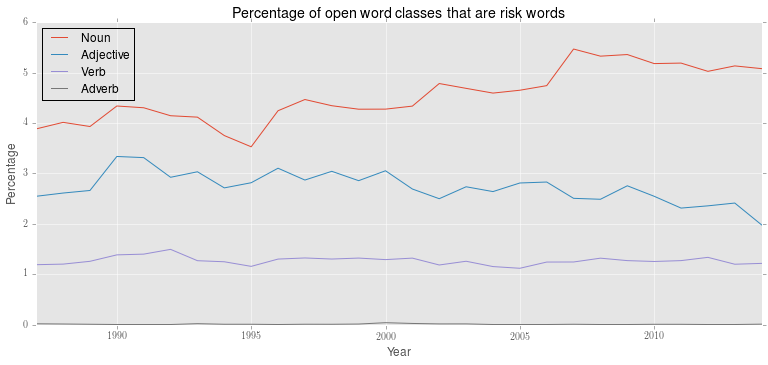

In [92]:
plotter('Percentage of open word classes that are risk words', maths_done.results, y_label = 'Percentage')

Neat, huh? We can see that nominalisation of risk is a very real thing.

Our problem, however, is that formal categories like noun and verb only take us so far: in the phrase "risk metrics", risk is a noun, but performs a modifier function, for example. In the next section, we interrogate the corpus for *functional*, rather than *formal* categorisations of risk words.

Before we start our corpus interrogation, we'll also present a *very* brief explanation of *Systemic Functional Linguistics*&mdash;the theory of language that underlies our analytical approach.

### Functional linguistics

*Functional linguistics* is a research area concerned with how *realised language* (lexis and grammar) work to achieve meaningful social functions. One functional linguistic theory is *Systemic Functional Linguistics*, developed by Michael Halliday.

In [93]:
from IPython.display import HTML
HTML('<iframe src=http://en.mobile.wikipedia.org/wiki/Michael_Halliday?useformat=mobile width=700 height=350></iframe>')

Central to the theory is a division between **experiential meanings** and **interpersonal meanings**.

* Experiential meanings communicate what happened to whom, under what circumstances.
* Interpersonal meanings negotiate identities and role relationships between speakers 

Halliday argues that these two kinds of meaning are realised **simultaneously** through different parts of English grammar.

* Experiential meanings are made through **transitivity choices**.
* Interpersonal meanings are made through **mood choices**

Here's one visualisation of it. We're concerned with the two left-hand columns. Each level is an abstraction of the one below it.

<br>
<img style="float:left" src="https://raw.githubusercontent.com/interrogator/risk/master/images/egginsfixed.jpg" alt="SFL metafunctions"  height="500" width="800" />
<br>

Transitivity choices include fitting together configurations of:

* Participants (*a man, green bikes*)
* Processes (*sleep, has always been, is considering*)
* Circumstances (*on the weekend*, *in Australia*)

Mood features of a language include:

* Mood types (*declarative, interrogative, imperative*)
* Modality (*would, can, might*)
* Lexical density&mdash;the number of words per clause, the number of content to non-content words, etc.

Lexical density is usually a good indicator of the general tone of texts. The language of academia, for example, often has a huge number of nouns to verbs. We can approximate an academic tone simply by making nominally dense clauses: 

      The consideration of interest is the potential for a participant of a certain demographic to be in Group A or Group B.

Notice how not only are there many nouns (*consideration*, *interest*, *potential*, etc.), but that the verbs are very simple (*is*, *to be*).

In comparison, informal speech is characterised by smaller clauses, and thus more verbs.

      A: Did you feel like dropping by?
      B: I thought I did, but now I don't think I want to

Here, we have only a few, simple nouns (*you*, *I*), with more expressive verbs (*feel*, *dropping by*, *think*, *want*)

> **Note**: SFL argues that through *grammatical metaphor*, one linguistic feature can stand in for another. *Would you please shut the door?* is an interrogative, but it functions as a command. *invitation* is a nominalisation of a process, *invite*. We don't have time to deal with these kinds of realisations, unfortunately.

### Functional roles of *risk* in the NYT

> *A discourse analysis that is not based on grammar is not an analysis at all, but simply a running commentary on a text.* - [M.A.K. Halliday, 1994]()

Our analysis proceeded according to the description of the transitivity system in *systemic functional grammar* ([SFG: see Halliday & Matthiessen, 2004](#ref:hallmat)).

The main elements of the transitivity system are *participants* (the arguments of main verbs) and *processes* (the verbal group). Broadly speaking, processes can be modified by circumstances (adverbs and prepositional phrases, and participants can be modified through epithets, classifiers (determiners, adjectives, etc).

> This is an oversimplification, of course. Grab a copy of the [*Introduction to Functional Grammar*](http://www.tandfebooks.com/isbn/9780203783771) to find out more.

Risk words can potentially be participants, processes or modifiers.

*Risk-as-participant*: any nominal argument of a process that is headed by a risk word. *Examples*:

* *the big risk*
* *considerable risk*
* *the risk of cancer*
* *risk-management*

*Risk-as-process*: risk word as the rightmost component of a VP. **Examples**:

* *he risked his life*
* *the company could potentially risk it*

*Risk-as-modifier*: any risk word that modifies a participant or process. This includes many adjectival risk words and many risk words appearing within prepositional or adverbial phrases. **Examples**:

* *the chance of risk*
* *risky business*
* *they riskily arranged to meet*

To find the distributions of these, we define three (very long and complicated) Tregex queries as sublists of titles and patterns under *query*. We then use `multiquery()` to search for each query in turn.

In [105]:
from corpkit import multiquery

query = (['Participant', r'/(?i).?\brisk.?/ > (/NN.?/ >># (NP !> PP !> (VP <<# (/VB.?/ < '
        '/(?i)\b(take|takes|taking|took|taken|run|runs|running|ran|pose|poses|posed|posing)\b/)))) | >># (ADJP > VP)'], 
    ['Process', r'VP !> VP << (/VB.?/ < /(?i).?\brisk.?/) | > VP <+(VP) (/VB.?/ < '
        '/(?i)(take|taking|takes|taken|took|run|running|runs|ran|put|putting|puts|pose|poses|posed|posing)/'
        '>># (VP < (NP <<# (/NN.?/ < /(?i).?\brisk.?/))))'], 
    ['Modifier', r'/(?i).?\brisk.?/ !> (/NN.?/ >># (NP !> PP !> (VP <<# (/VB.?/ < '
        '/(?i)\b(take|takes|taking|took|taken|run|runs|running|ran|pose|poses|posed|posing)\b/)))) & !>># '
        '(ADJP > VP) & !> (/VB.?/ >># VP) & !> (/NN.?/ >># (NP > (VP <<# (/VB.?/ < /(?i)\b('
            'take|takes|taking|took|taken|run|runs|running|ran|pose|poses|posed|posing)\b/))))'])

functional_role = multiquery('data/nyt/years', query)

In [107]:
ppm = editor(functional_role.results, '%', allwords.totals)

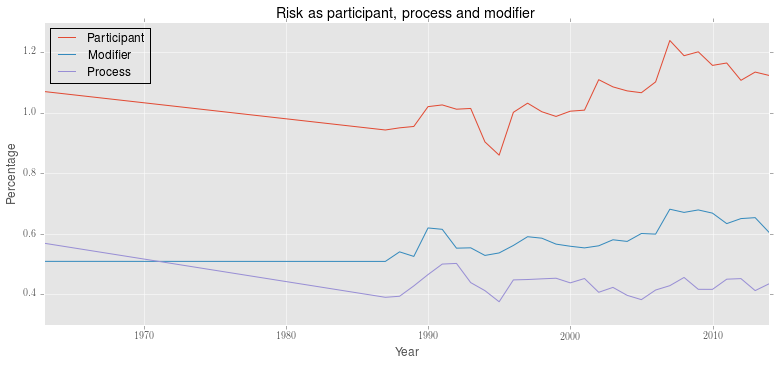

In [108]:
plotter('Risk as participant, process and modifier', ppm.results)

Here we can see that modifier forms are become more frequent over time, and have overtaken risk processes. Later, we determine which modifier forms in particular are becoming more common.

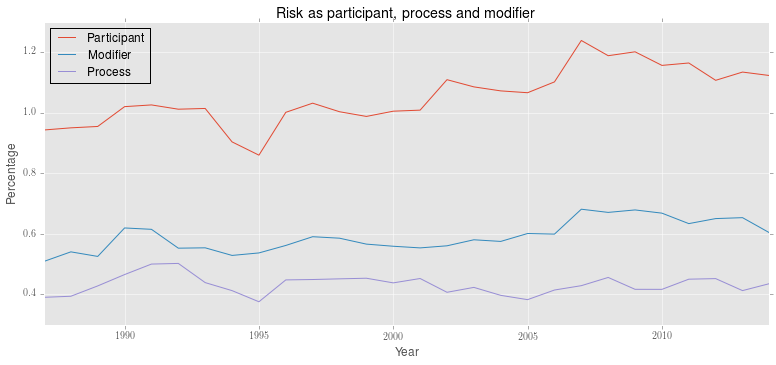

In [110]:
# Perhaps you want to see the result without 1963?
plotter('Risk as participant, process and modifier', ppm.results.drop('1963'))

### Risk as participant

> *You shall know a word by the company it keeps.* - [J.R. Firth, 1957](#ref:firth)

Functionally, *risk* is most commonly a participant in the NYT. This gives us a lot of potential areas of interest. We'll go through a few here, but there are plenty of other things that we have to leave out for reasons of space.

### Process types for participant risk

Here, we need to import verbose regular expressions that match any relational, verbal or mental process.

In [111]:
from dictionaries.process_types import processes
print processes.relational
print processes.verbal

(?i)\b((sound{0,2}|look{0,2}|seem{0,2}|appear{0,2})(s|es|ed|ing|)|(become|becomes|became|become|becoming|appear|appears|feel|feels|felt|feeling|smell|smells|smelled|smelt|smelling|be|was|been|being|are|were|is|am|[^a-z]s|[^a-z]m|[^a-z]re|have|has|had|had|having|[^a-z]d|[^a-z]ve))\b
(?i)\b((accede{0,2}|add{0,2}|admit{0,2}|advise{0,2}|advocate{0,2}|allege{0,2}|announce{0,2}|answer{0,2}|apprise{0,2}|argue{0,2}|ask{0,2}|assert{0,2}|assure{0,2}|attest{0,2}|aver{0,2}|avow{0,2}|bark{0,2}|beg{0,2}|bellow{0,2}|blubber{0,2}|boast{0,2}|brag{0,2}|cable{0,2}|claim{0,2}|comment{0,2}|complain{0,2}|confess{0,2}|confide{0,2}|confirm{0,2}|contend{0,2}|convey{0,2}|counsel{0,2}|declare{0,2}|demand{0,2}|disclaim{0,2}|disclose{0,2}|divulge{0,2}|emphasise{0,2}|emphasize{0,2}|exclaim{0,2}|explain{0,2}|forecast{0,2}|gesture{0,2}|grizzle{0,2}|guarantee{0,2}|hint{0,2}|holler{0,2}|indicate{0,2}|inform{0,2}|insist{0,2}|intimate{0,2}|mention{0,2}|moan{0,2}|mumble{0,2}|murmur{0,2}|mutter{0,2}|note{0,2}|object{0,2}|o

We can use these in our Tregex queries to look for the kinds of processes participant risks are involved in. First, let's get a count for all processes with risk participants:

In [112]:
# get total number of processes with risk participant
query = r'/VB.?/ ># (VP ( < (NP <<# /(?i).?\brisk.?/) | >+(/.P$/) (VP $ (NP <<# /(?i).?\brisk.?/))))'
proc_w_risk_part = interrogator(annual_trees, 'count', query)

### Relational processes with risk participant

In [113]:
# subj_query = r'/VB.?/ < %s ># (VP >+(/.P$/) (VP $ (NP <<# /(?i).?\brisk.?/)))' % processes.relational
# obj_query = r'/VB.?/ < %s ># (VP < (NP <<# /(?i).?\brisk.?/))'  % processes.relational
query = r'/VB.?/ < /%s/ ># (VP ( < (NP <<# /(?i).?\brisk.?/) | >+(/.P$/) (VP $ (NP <<# /(?i).?\brisk.?/))))' % processes.relational
relationals = interrogator(annual_trees, 'words', query, lemmatise = True)

 18:36:39: Finished! 5 unique results, 23135 total.


In [115]:
rels = editor(relationals.results, '%', proc_w_risk_part.totals)

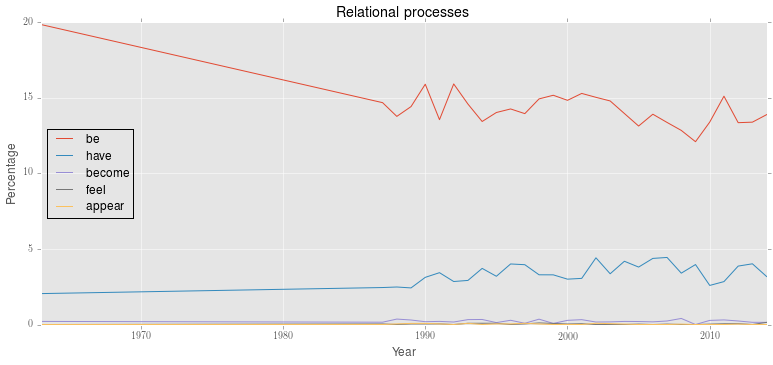

In [116]:
plotter('Relational processes', rels.results)

### Material processes with risk participant

In [117]:
# material: none of the others
query = r'/VB.?/ !< /%s/ !< /%s/ !< /%s/ ># (VP ( < (NP <<# /(?i).?\brisk.?/) | >+(/.P$/) (VP $ (NP <<# /(?i).?\brisk.?/))))' % (processes.relational, processes.verbal, processes.mental)
materials = interrogator(annual_trees, 'words', query, lemmatise = True)

 18:56:57: Finished! 1559 unique results, 102568 total.


Skipping 3 entries:
    take
    run
    pose

Skipping 1 subcorpora:
    1963







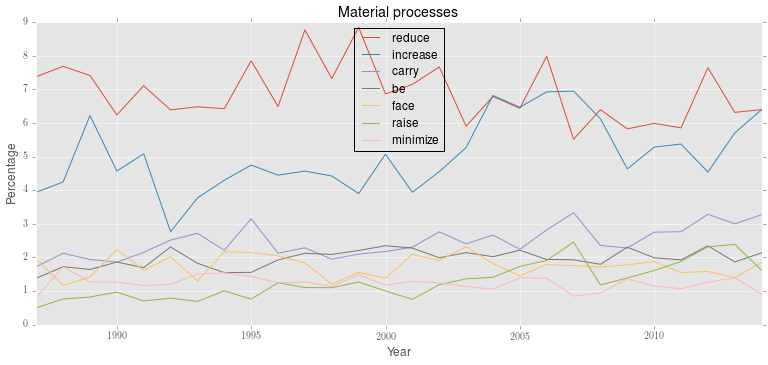

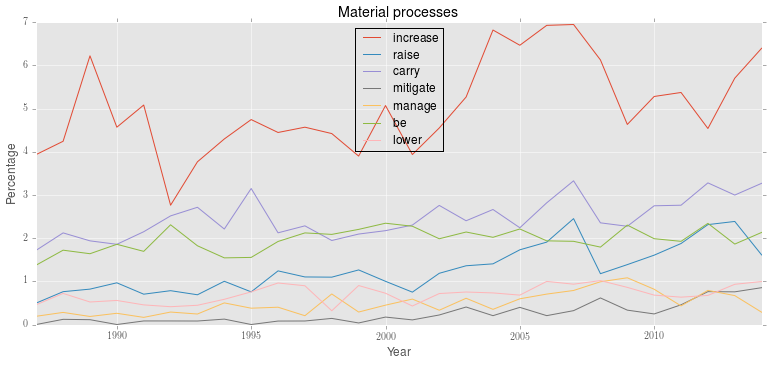

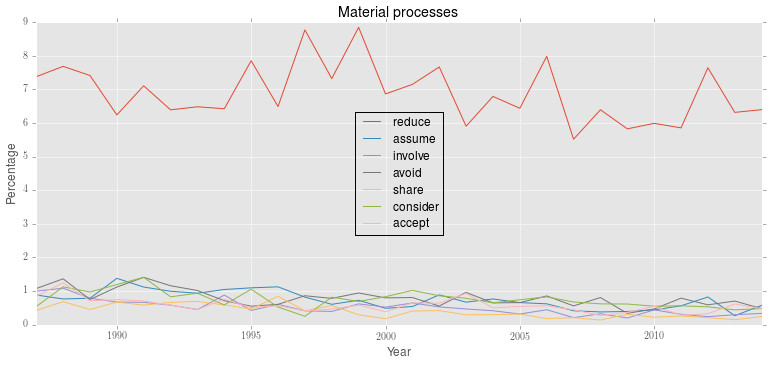

In [123]:
skip_processes = editor(materials.results, '%', proc_w_risk_part.totals, skip_entries = ['take', 'run', 'pose'], skip_subcorpora = [1963])

plotter('Material processes', editor(skip_processes.results, sort_by = 'total',).results)
plotter('Material processes', editor(skip_processes.results, sort_by = 'increase').results)
plotter('Material processes', editor(skip_processes.results, sort_by = 'decrease').results)

### Adjectives modifying risk

First, we can look at adjectives that modify a participant risk.

In [124]:
query = r'/JJ.?/ > (NP <<# /(?i).?\brisk.?/ ( > VP | $ VP))'
adj_modifiers = interrogator(annual_trees, 'words', query, lemmatise = True)

 19:13:52: Finished! 1159 unique results, 27234 total.


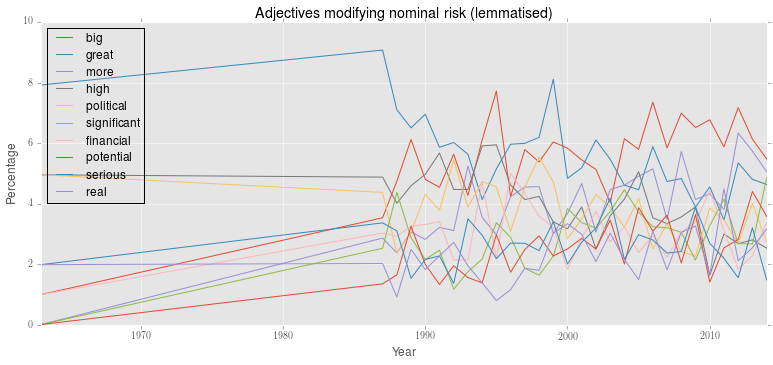

In [125]:
# Adjectives modifying nominal risk (lemmatised)
plotter('Adjectives modifying nominal risk (lemmatised)', editor(adj_modifiers.results, 
    '%', adj_modifiers.totals).results, num_to_plot = 10)

Yuck! That doesn't tell us much. Let's try visualising the data in a few different ways. First, let's see what the top results look like...

In [126]:
quickview(adj_modifiers.results)

  0: big (n=1596)
  1: great (n=1425)
  2: more (n=1174)
  3: high (n=989)
  4: political (n=962)
  5: significant (n=848)
  6: financial (n=828)
  7: potential (n=735)
  8: serious (n=728)
  9: real (n=667)
 10: such (n=494)
 11: little (n=459)
 12: calculated (n=434)
 13: systemic (n=428)
 14: huge (n=406)
 15: own (n=398)
 16: substantial (n=361)
 17: excessive (n=346)
 18: low (n=342)
 19: new (n=326)
 20: less (n=317)
 21: considerable (n=304)
 22: few (n=268)
 23: other (n=264)
 24: same (n=263)


OK, here are some ideas:

In [128]:
# a file for working with dataframe1s. most importantly, make a dataframe1 plotter.

def editor(dataframe1, 
            operation = '%',
            dataframe2 = False,
            sort_by = False,
            keep_stats = False,
            keep_top = False,
            just_totals = False,
            threshold = 'medium',
            
            just_entries = False,
            skip_entries = False,
            merge_entries = False,
            newname = 'combine',

            just_subcorpora = False,
            skip_subcorpora = False,
            span_subcorpora = False,
            merge_subcorpora = False,
            new_subcorpus_name = False,

            projection = False,

            only_totals = False,
            remove_above_p = False,
            p = 0.05, 
            revert_year = True
            ):
    """Edit results of corpus interrogation"""

    import pandas
    import pandas as pd
    import numpy as np
    import collections
    from pandas import DataFrame, Series
    from corpkit.progressbar import ProgressBar
    try:
        get_ipython().getoutput()
    except TypeError:
        have_ipython = True
    except NameError:
        have_ipython = False
    try:
        from IPython.display import display, clear_output
    except ImportError:
        pass

    def combiney(df, df2, operation = '%', threshold = 'medium', just_totals = False):
        """mash df and df2 together in appropriate way"""
        if single_totals:
            if operation == '%':
                if just_totals:
                    df = df * 100.0 / df2.sum()
                else:
                    df = df * 100.0
                    df = df.div(list(df2), axis = 0)
            elif operation == '+':
                df = df.add(list(df2), axis = 0)
            elif operation == '-':
                df = df.sub(list(df2), axis = 0)
            elif operation == '*':
                df = df.mul(list(df2), axis = 0)
            elif operation == '/':
                df = df.div(list(df2), axis = 0)
            return df

        elif not single_totals:
            if just_totals:
                if operation == '%':
                    # leaves 0.0 if not found ...
                    df = df * 100.0 / df2.sum()

            else:
                p = ProgressBar(len(list(df.columns)))
                for index, entry in enumerate(list(df.columns)):
                    p.animate(index)
                    if operation == '%':
                        try:
                            df[entry] = df[entry] * 100.0 / df2[entry]
                        except:
                            continue
                        #df.drop(entry, axis = 1, inplace = True)
                        #df[entry] = maths_done
                    elif operation == '+':
                        try:
                            df[entry] = df[entry] + df2[entry]
                        except:
                            continue
                    elif operation == '-':
                        try:
                            df[entry] = df[entry] - df2[entry]
                        except:
                            continue
                    elif operation == '*':
                        try:
                            df[entry] = df[entry] * df2[entry]
                        except:
                            continue
                    elif operation == '/':
                        try:
                            df[entry] = df[entry] / df2[entry]
                        except:
                            continue
                p.animate(len(list(df.columns)))
                if have_ipython:
                    clear_output()
        return df

    def parse_input(input):
        """turn whatever has been passed in into list of words that can be used as pandas indices"""
        import re
        if type(input) == int:
            input = [input]

        elif type(input) == str:
            try:
                regex = re.compile(input)
                parsed_input = [w for w in list(df) if re.search(regex, w)]

            except:
                input = [input]

        if type(input) == list:
            if type(input[0]) == int:
                parsed_input = [word for index, word in enumerate(list(df)) if index in input]
            elif type(input[0]) == str:
                parsed_input = [word for word in input if word in df.columns]

        return parsed_input

    def just_these_entries(df, parsed_input):
        entries = [word for word in list(df) if word not in parsed_input]
        print 'Keeping %d entries:\n    %s\n' % (len(parsed_input), '\n    '.join(parsed_input[:20]))
        if len(parsed_input) > 20:
            print '... and %d more ... \n' % (len(parsed_input) - 20)
        df = df.drop(entries, axis = 1)
        return df

    def skip_these_entries(df, parsed_input):
        print 'Skipping %d entries:\n    %s\n' % (len(parsed_input), '\n    '.join(parsed_input[:20]))
        if len(parsed_input) > 20:
            print '... and %d more ... \n' % (len(parsed_input) - 20)
        df = df.drop(parsed_input, axis = 1)
        return df

    def newname_getter(df, parsed_input, newname = 'combine'):
        """makes appropriate name for merged entries"""
        if type(newname) == int:
            the_newname = list(df.columns)[newname]
        elif type(newname) == str:
            if newname == 'combine':
                if parsed_input < 4:
                    the_newname = '/'.join(parsed_input)
                else:
                    the_newname = '/'.join(parsed_input[:4]) + '...'
            else:
                the_newname = newname
        if newname is False:
            # revise this code
            import operator
            sumdict = {}
            for item in parsed_input:
                summed = sum(list(df[item]))
                sumdict[item] = summed
            the_newname = max(sumdict.iteritems(), key=operator.itemgetter(1))[0]
        if type(the_newname) != unicode:
            the_newname = unicode(the_newname, errors = 'ignore')
        return the_newname

    def merge_these_entries(df, parsed_input, the_newname):
        # make new entry with sum of parsed input
        print 'Merging %d entries as "%s":\n    %s\n' % (len(parsed_input), the_newname, '\n    '.join(parsed_input[:20]))
        if len(parsed_input) > 20:
            print '... and %d more ... \n' % (len(parsed_input) - 20)
        # remove old entries
        temp = sum([df[i] for i in parsed_input])
        df = df.drop(parsed_input, axis = 1)
        df[the_newname] = temp
        return df

    def just_these_subcorpora(df, lst_of_subcorpora):
        if type(lst_of_subcorpora[0]) == int:
            lst_of_subcorpora = [str(l) for l in lst_of_subcorpora]
        good_years = [subcorpus for subcorpus in list(df.index) if subcorpus in lst_of_subcorpora]
        print 'Keeping %d subcorpora:\n    %s\n' % (len(good_years), '\n    '.join(good_years[:20]))
        if len(good_years) > 20:
            print '... and %d more ... \n' % len(good_years) - 20
        df = df.drop([subcorpus for subcorpus in list(df.index) if subcorpus not in good_years], axis = 0)
        return df

    def skip_these_subcorpora(df, lst_of_subcorpora):
        if type(lst_of_subcorpora) == int:
            lst_of_subcorpora = [lst_of_subcorpora]
        if type(lst_of_subcorpora[0]) == int:
            lst_of_subcorpora = [str(l) for l in lst_of_subcorpora]
        bad_years = [subcorpus for subcorpus in list(df.index) if subcorpus in lst_of_subcorpora]
        print 'Skipping %d subcorpora:\n    %s\n' % (len(bad_years), '\n    '.join([str(i) for i in bad_years[:20]]))
        if len(bad_years) > 20:
            print '... and %d more ... \n' % len(bad_years) - 20
        df = df.drop([subcorpus for subcorpus in list(df.index) if subcorpus in bad_years], axis = 0)
        return df

    def span_these_subcorpora(df, lst_of_subcorpora):
        non_totals = [subcorpus for subcorpus in list(df.index)]
        good_years = [subcorpus for subcorpus in non_totals if int(subcorpus) >= int(lst_of_subcorpora[0]) and int(subcorpus) <= int(lst_of_subcorpora[-1])]
        print 'Keeping subcorpora:\n    %d--%d' % (int(lst_of_subcorpora[0]), int(lst_of_subcorpora[-1]))
        df = df.drop([subcorpus for subcorpus in list(df.index) if subcorpus not in good_years], axis = 0)
        # retotal needed here
        return df

    def projector(df, list_of_tuples):
        for subcorpus, projection_value in list_of_tuples:
            if type(subcorpus) == int:
                subcorpus = str(subcorpus)
            df.ix[subcorpus] = df.ix[subcorpus] * projection_value
        return df
    
    def merge_these_subcorpora(df, lst_of_subcorpora, new_subcorpus_name = False):
        # handles subcorpus names, not indices, right now
        if type(lst_of_subcorpora) == int:
            lst_of_subcorpora = [lst_of_subcorpora]
        if type(lst_of_subcorpora[0]) == int:
            lst_of_subcorpora = [str(l) for l in lst_of_subcorpora]
        if new_subcorpus_name is False:
            the_newname = '/'.join(sorted(lst_of_subcorpora))
        elif type(new_subcorpus_name) == str:
            the_newname = new_subcorpus_name

        if type(df) == pandas.core.frame.DataFrame:
            df.ix[the_newname] = sum([df.ix[i] for i in lst_of_subcorpora])
            df = df.drop(lst_of_subcorpora, axis = 0)
        if type(df) == pandas.core.series.Series:
            df[the_newname] = sum([df[i] for i in lst_of_subcorpora])
            df = df.drop(lst_of_subcorpora)
        return df

    def do_stats(df):
        """do linregress and add to df"""
        from scipy.stats import linregress
        entries = []
        slopes = []
        intercepts = []
        rs = []
        ps = []
        stderrs = []
        indices = list(df.index)
        first_year = list(df.index)[0]
        try:
            x = [int(y) - int(first_year) for y in indices]
        except ValueError:
            x = range(len(indices))
        statfields = ['slope', 'intercept', 'r', 'p', 'stderr']
        for entry in list(df.columns):
            entries.append(entry)
            y = list(df[entry])
            slope, intercept, r, p, stderr = linregress(x, y)
            slopes.append(slope)
            intercepts.append(intercept)
            rs.append(r)
            ps.append(p)
            stderrs.append(stderr)
        sl = pd.DataFrame([slopes, intercepts, rs, ps, stderrs], 
                           index = statfields, 
                           columns = list(df.columns))
        df = df.append(sl)
        return df

    def recalc(df, operation = '%'):
        """Add totals to the dataframe1"""

        #df.drop('Total', axis = 0, inplace = True)
        #df.drop('Total', axis = 1, inplace = True)

        df['Total'] = df.sum(axis = 1)
        df = df.T
        df['Total'] = df.sum(axis = 1)
        df = df.T

        # make totals percentages if need be.
        #if operation == '%':
        #    df['Total'] = df['Total'] * 100.0
        #    df['Total'] = df['Total'].div(list(df2), axis = 0)
        #elif operation == '+':
        #    df['Total'] = df['Total'].add(list(df2), axis = 0)
        #elif operation == '-':
        #    df['Total'] = df['Total'].sub(list(df2), axis = 0)
        #elif operation == '*':
        #    df['Total'] = df['Total'].mul(list(df2), axis = 0)
        #elif operation == '/':
        #    df['Total'] = df['Total'].div(list(df2), axis = 0)
        return df

    def resort(df, sort_by = False, keep_stats = False):
        """sort results"""
        # translate options and make sure they are parseable
        options = ['total', 'name', 'infreq', 'increase', 
                   'decrease', 'static', 'most', 'least', 'none']

        if sort_by is True:
            sort_by = 'total'
        if sort_by == 'most':
            sort_by = 'total'
        if sort_by == 'least':
            sort_by = 'infreq'
        if sort_by not in options:
            raise ValueError("sort_by parameter error: '%s' not recognised. Must be True, False, %s" % (sort_by, ', '.join(options)))

        if sort_by == 'total':
            if df1_istotals:
                df = df.T
            df = recalc(df, operation = operation)
            tot = df.ix['Total']
            df = df[tot.argsort()[::-1]]
            df = df.drop('Total', axis = 0)
            df = df.drop('Total', axis = 1)
            if df1_istotals:
                df = df.T
            #df = recalc(df, operation = operation)
        elif sort_by == 'infreq':
            df = recalc(df, operation = operation)
            tot = df.ix['Total']
            df = df[tot.argsort()]
            df = df.drop('Total', axis = 0)
            df = df.drop('Total', axis = 1)
            #df = recalc(df, operation = operation)
        elif sort_by == 'name':
            # currently case sensitive...
            df = df.reindex_axis(sorted(df.columns), axis=1)
            #df = recalc(df, operation = operation)
        else:
            statfields = ['slope', 'intercept', 'r', 'p', 'stderr']
            df = do_stats(df)
            slopes = df.ix['slope']
            if sort_by == 'increase':
                df = df[slopes.argsort()[::-1]]
            elif sort_by == 'decrease':
                df = df[slopes.argsort()]
            
            # untested
            if remove_above_p:
                df = df.T.loc[:, (df.T.p < p)].T
            
            # list of all columns
            move_totals = list(df.columns)
            
            # add total to end           
            #try:
                #move_totals.remove('Total')
                #move_totals.append('Total')
            #except:
                #pass

            # remove stats field by default
            if not keep_stats:
                df = df.drop(statfields, axis = 0)

            # or, remove them from the columns list and add them to the end
            else:
                for stat in statfields:
                    move_totals.remove(stat)
                    move_totals.append(stat)

            # reorder with totals and stats at end
            df = df[move_totals]

            #elif sort_by == 'static':
                #reordered = 

            #if operation != '%':
                #df = recalc(df, operation = operation)
        return df

    def set_threshold(big_list, threshold):
        if type(threshold) == str:
            if threshold.startswith('l'):
                denominator = 10000
            if threshold.startswith('m'):
                denominator = 5000
            if threshold.startswith('h'):
                denominator = 2500

            if type(big_list) == pandas.core.frame.DataFrame:
                tot = big_list.sum().sum()

            if type(big_list) == pandas.core.series.Series:
                tot = big_list.sum()
            the_threshold = float(tot) / float(denominator)

        else:
            the_threshold = threshold
        
        print 'Threshold: %d' % the_threshold
        return the_threshold

#####################################################


    # check if we're in concordance mode
    try:
        if list(dataframe1.columns) == ['l', 'm', 'r']:
            conc_lines = True
        else:
            conc_lines = False
    except:
        conc_lines = False

    # copy dataframe to be very safe
    df = dataframe1.copy()

    if conc_lines:
        df = dataframe1.copy()

        if just_entries:
            if type(just_entries) == int:
                just_entries = [just_entries]
            if type(just_entries) == list:
                if type(just_entries[0]) != int:
                    raise ValueError('just_entries must be int or list of ints when working with concordance lines.')
                else:
                    df = df.ix[just_entries].reset_index(drop = True)

        if skip_entries:
            if type(skip_entries) == int:
                skip_entries = [skip_entries]
            if type(skip_entries) == list:
                if type(skip_entries[0]) != int:
                    raise ValueError('skip_entries must be int or list of ints when working with concordance lines.')
                else:
                    df = df.ix[[e for e in list(df.index) if e not in skip_entries]].reset_index(drop = True)

        return df


    df1_istotals = False
    if type(df) == pandas.core.series.Series:
        df1_istotals = True
        df = pandas.DataFrame(df)
        # if just a single result
    else:
        df = pandas.DataFrame(df) # set it the correct name?
    if just_totals:
        # does this need to be made into a dataframe!?
        df = df.sum()
        # df = pd.DataFrame(df, index = list(df.index))

    #df = df.T
    #if just_totals:
        #df = pd.DataFrame([sum(df[i]) for i in list(df.columns)], index = list(df.columns))
    #else:
        #try:
            #df = df.drop('Total', axis = 0)
        #except:
            #pass
        #try:
            #df = df.drop('Total', axis = 1)
        #except:
            #pass
    
    # figure out if there's a second list
    # copy and remove totals if there is
    single_totals = True
    using_totals = False

    try:
        if dataframe2.empty is False:
            df2 = dataframe2.copy()
            using_totals = True
            #df2 = df2
            if type(df2) == pandas.core.frame.DataFrame:
                if len(df2.columns) > 1:
                    single_totals = False
                else:
                    df2 = pd.Series(df2)
                #if operation != '%':
            elif type(df2) == pandas.core.series.Series:
                single_totals = True
                #if just_totals:
                    # it should already be just_totals
                    #df2 = pd.Series([sum(df2[i]) for i in list(df2.columns)])
            else:
                raise ValueError('dataframe2 not recognised.')   
    except AttributeError:
        pass


    if projection:
        # projection shouldn't do anythign when working with '%', remember.
        df = projector(df, projection)
        if using_totals:
            df2 = projector(df2, projection)


    # do all merging before combining anything

    if merge_entries:
        the_newname = newname_getter(df, parse_input(merge_entries), newname = newname)
    if merge_entries:
        df = merge_these_entries(df, parse_input(merge_entries), the_newname)
    if merge_subcorpora:
        df = merge_these_subcorpora(df, merge_subcorpora, new_subcorpus_name = new_subcorpus_name)

    if not single_totals:
        if merge_entries:
            df2 = merge_these_entries(df2, parse_input(merge_entries), the_newname)
    if using_totals:    
        if merge_subcorpora:
            df2 = merge_these_subcorpora(df2, merge_subcorpora, new_subcorpus_name = new_subcorpus_name)        

    # combine lists
    use_combiney = False
    try:
        if dataframe2.empty is False:
            use_combiney = True
            # set a threshold if just_totals
            if just_totals:
                the_threshold = set_threshold(df2, threshold)
            else:
                the_threshold = 0
            df = combiney(df, df2, operation = operation, threshold = the_threshold, just_totals = just_totals)
    except AttributeError:
        pass

    # chop up data as required

    if just_entries:
        df = just_these_entries(df, parse_input(just_entries))
    if skip_entries:
        df = skip_these_entries(df, parse_input(skip_entries))

    if just_subcorpora:
        df = just_these_subcorpora(df, just_subcorpora)
    if skip_subcorpora:
        df = skip_these_subcorpora(df, skip_subcorpora)
    if span_subcorpora:
        df = span_these_subcorpora(df, span_subcorpora)

    # drop infinites and nans
    df = df.replace([np.inf, -np.inf], np.nan)
    df = df.fillna(0.0)

    # resort data
    if sort_by:
        df = resort(df, keep_stats = keep_stats, sort_by = sort_by)
    
    if keep_top:
        if not just_totals:
            df = df[list(df.columns)[:keep_top]]
        else:
            import warnings
            warnings.warn("keep_top has no effect if just_totals is True.")

    # generate totals branch:
    if df1_istotals:
        total = pd.Series(df['Total'], name = 'Total')
        #total = df.copy()
    else:
        if operation != '%':
            total = df.T.sum()
        else:
            if using_totals:
                tot1 = dataframe1.T.sum()
                if single_totals:
                    tot2 = dataframe2
                else:
                    tot2 = dataframe2.T.sum()
                total = tot1 * 100.0 / tot2
            else:
                total = dataframe1.T.sum()


    #make named_tuple
    the_option = 'totals'
    if using_totals:
        the_option = operation
        query_bit = ['coming soon', the_option, 'coming soon']
    else:
        try:
            if type(df[list(df.columns)[0]][list(df.index)[0]]) == numpy.float64:
                the_option = '%'
            else:
                the_option = 'totals' # fake name, interpreted as abs freq result
        except:
            pass
    query_bit = ['coming soon', the_option, 'coming soon']

    outputnames = collections.namedtuple('interrogation', ['query', 'results', 'totals'])
    output = outputnames(query_bit, df, total)

    # pandas options
    pd.set_option('display.max_columns', 4)
    pd.set_option('display.max_rows', 5)
    pd.set_option('expand_frame_repr', False)

    #print '\nResult (sample)\n'
    #print '=' * 80 + '\n'
    #print df.head().T
    print ''

    return output


Skipping 1086 entries:
    great
    political
    significant
    financial
    potential
    serious
    little
    calculated
    systemic
    substantial
    excessive
    considerable
    other
    major
    enormous
    environmental
    unnecessary
    grave
    additional
    long-term

... and 1066 more ... 


Keeping 481 entries:
    significant
    calculated
    substantial
    considerable
    environmental
    unnecessary
    additional
    cardiovascular
    particular
    acceptable
    tremendous
    short-term
    risk-taking
    reasonable
    regulatory
    extraordinary
    geopolitical
    theoretical
    individual
    negligible

... and 461 more ... 


Keeping 4 entries:
    more
    high
    calculated
    potential




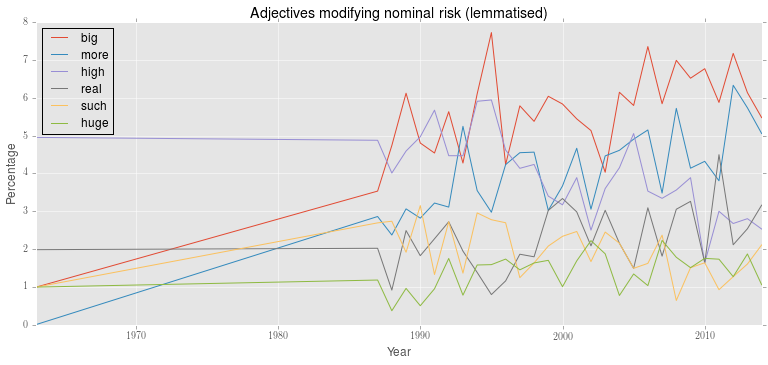

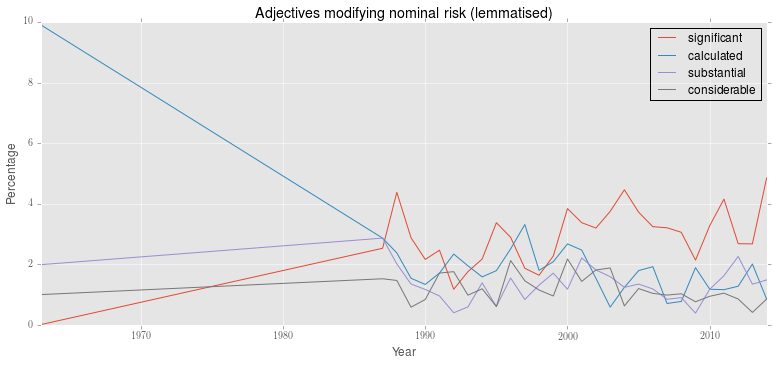

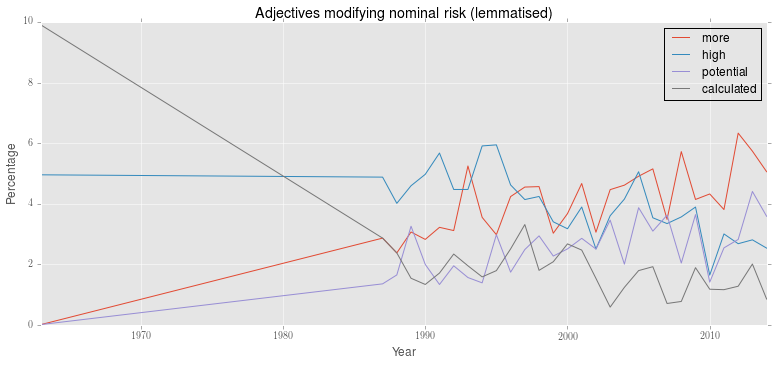

In [130]:
# remove words with five or more letters
small_adjs = editor(adj_modifiers.results, '%', adj_modifiers.totals, skip_entries = r'.{5,}')

plotter('Adjectives modifying nominal risk (lemmatised)', small_adjs.results, num_to_plot = 6)

#get results with seven or more letters
big_adjs = editor(adj_modifiers.results, '%', adj_modifiers.totals, just_entries = '.{10,}')
plotter('Adjectives modifying nominal risk (lemmatised)', big_adjs.results, num_to_plot = 4)

#get a few interesting points
lst = ['more', 'high', 'calculated', 'potential']
select_adjs = editor(adj_modifiers.results, '%', adj_modifiers.totals, just_entries = lst)
plotter('Adjectives modifying nominal risk (lemmatised)', select_adjs.results, 
    num_to_plot = 4)

Wow! What's happening with *calculated risk* in 1963? Let's modify the original Tregex query a little and use `conc()` to find out.

In [132]:
### old query: r'/JJ.?/ > (NP <<# /(?i).?\brisk.?/ ( > VP | $ VP))'
calculated_risk = r'/JJ.?/ < /(?i)calculated/> (NP <<# /(?i).?\brisk.?/ ( > VP | $ VP))'
# remove '( > VP | $ VP)' from the line above to get more instances
lines = conc('data/nyt/years/1963', calculated_risk)


19:23:44: Getting concordances for data/nyt/years/1963 ... 
          Query: /JJ.?/ < /(?i)calculated/> (NP <<# /(?i).?\brisk.?/ ( > VP | $ VP))

0   , in Cuba , Chairman Khrushchev took a   calculated   risk by installing long-range missiles  
1                      Kennedy has taken a   calculated   risk here                               
2         , the foreman last year , took a   calculated   risk and rebuilt the pitching staff with
3     a study in depth had been made was a   calculated   risk                                    
4                                This is a   calculated   risk , but in the light of recent       
5                  U A.M. , `` Prayer Is a   Calculated   Risk                                    
6     Unite '' States is still surrounding   Calculated   Risk some basic forms of economic       
7                            London took a   calculated   risk in gambling everything on success  
8                                 It was a   calculated   ris

### Risk of ... ?

Next, we'll look at risk of (noun) constructions, as in:

In [137]:
lines = conc('data/nyt/years/1988', r'/NN.?/ >># (NP > (PP <<# /(?i)of/ > (NP <<# (/NN.?/ < /(?i).?\brisk.?/))))', n = 25, random = True)


19:39:04: Getting concordances for data/nyt/years/1988 ... 
          Query: /NN.?/ >># (NP > (PP <<# /(?i)of/ > (NP <<# (/NN.?/ < /(?i).?\brisk.?/))))

0     elderly persons most at risk of severe        illness   and death from the contagious viral     
1         against the risk of his network 's        decline   '' from Murrow to mediocrity            
2    lesson about the risk of overestimating      obstacles   , and it has made one mathematician $ 1,
3         babies -RRB- because the risk of a           suit   is too high                             
4     legal services for families at risk of   homelessness   in Manhattan                            
5     it significantly increases the risk of        illness   and death suggests a serious flaw in the
6   of the associated heightened risk of the         spread   of AIDS                                 
7       if a patient poses a serious risk of       violence   to others , his therapist has a duty to 
8    instructed to stu

Notice that singular and plural forms may be in the results: both *substance* and *substances* are returned, and would be counted as unique items.

If we want to ignore the difference between singular and plural (or different inflections of a verb), we need to use a *lemmatiser*. Luckily, `interrogator()` has one built in.

When lemmatisation is necessary, we can pass a `lemmatise = True` parameter to `interrogator()`.

Lemmatisation requires knowing the part of speech of the input. `interrogator()` determines this by looking at the first part of the Tregex query: if it's `/JJ.?/`, the lemmatiser will be told that the word is an adjective. If the part of speech cannot be located, noun is used as a default. You can also manually pass a tag to the lemmatiser with a `lemmatag = 'n/v/r/a'` option.

In [134]:
# Risk of (noun)
query = r'/NN.?/ >># (NP > (PP <<# /(?i)of/ > (NP <<# (/NN.?/ < /(?i).?\brisk.?/))))'
risk_of = interrogator(annual_trees, 'words', query, lemmatise = True)

 19:38:49: Finished! 3302 unique results, 50062 total.



Keeping subcorpora:
    1999--2013



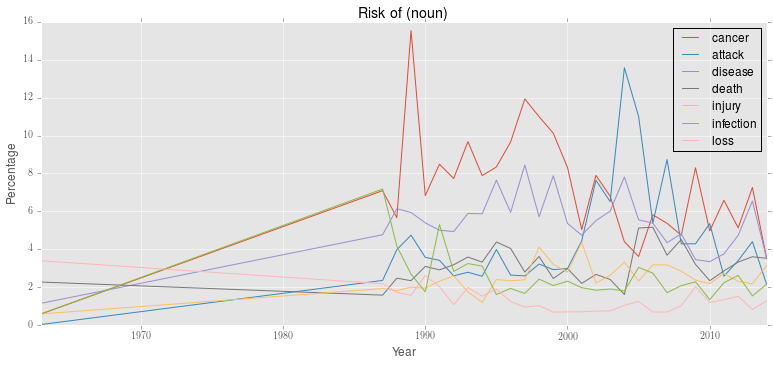

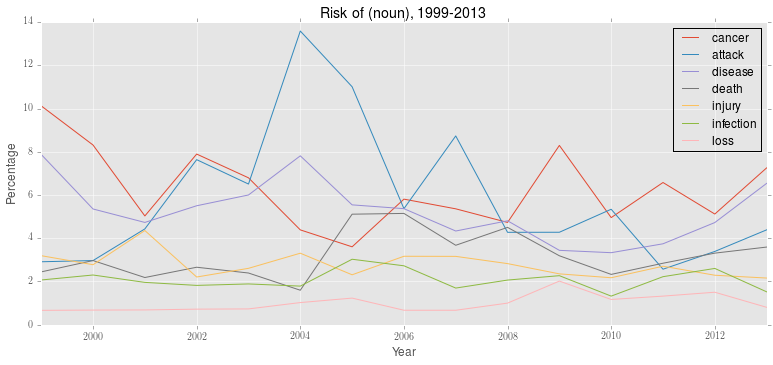

In [135]:
rel_riskof = editor(risk_of.results, '%', risk_of.totals)
plotter('Risk of (noun)', rel_riskof.results)
plotter('Risk of (noun), 1999-2013', editor(rel_riskof.results, span_subcorpora = [1999,2013]).results)

### A cautionary tale ...

At one point in our investigation, we looked specifically for military risks. From these results, we saw that *risk of attack* and *risk of war* were common. So, we plotted them:

In [138]:
quickview(risk_of, n = 20)

  0: cancer (n=3354)
  1: attack (n=2699)
  2: disease (n=2665)
  3: death (n=1604)
  4: injury (n=1294)
  5: infection (n=1170)
  6: loss (n=591)
  7: failure (n=588)
  8: problem (n=576)
  9: default (n=558)
 10: inflation (n=528)
 11: war (n=512)
 12: stroke (n=489)
 13: complication (n=460)
 14: damage (n=385)
 15: harm (n=376)
 16: transmission (n=330)
 17: diabetes (n=320)
 18: recession (n=318)
 19: suicide (n=317)


Keeping 2 entries:
    attack
    war




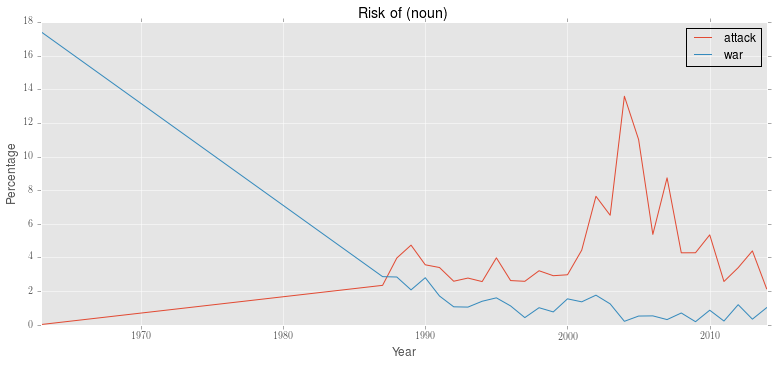

In [139]:
military = editor(risk_of.results, '%', risk_of.totals, just_entries = ['attack', 'war'])
plotter('Risk of (noun)', military.results) 

 We thought it was interesting how *risk of attack* rose in frequency shortly after 9/11. So, we decided to look more closely at *risk of attack*:

In [ ]:
attackrisk = r'/NN.?/ < /(?i)attack.?/ >># (NP > (PP <<# /(?i)of/ > (NP <<# (/NN.?/ < /(?i).?\brisk.?/))))'
lindex = conc('data/nyt/years/2004', attackrisk, n = 15, random = True) 

Whoops. We were wrong. Almost all occurrences actually referred to *heart attack*!

In [149]:
query = r'/NN.?/ < /(?i)\b(heart|terror).?/ $ (/NN.?/ < /(?i)\battack.?/ >># (NP > (PP <<# /(?i)of/ > (NP <<# (/NN.?/ < /().?\brisk.?/)))))' 
terror_heart = interrogator(annual_trees, 'words', query, lemmatise = True)

 20:38:49: Finished! 2 unique results, 1949 total.


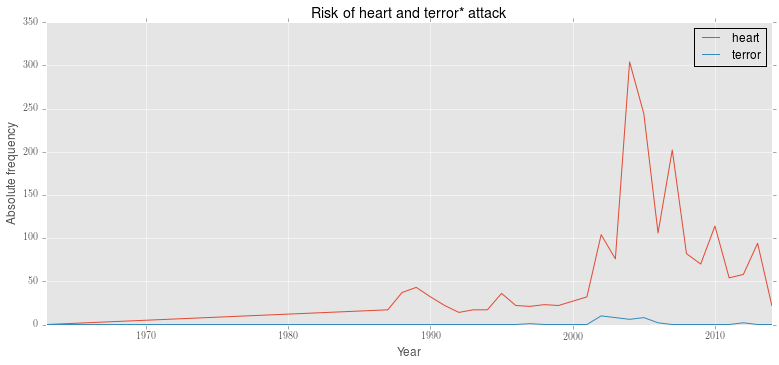

In [150]:
plotter('Risk of heart and terror* attack', terror_heart.results, num_to_plot = 2)

So, we were a long way off-base. This is an ever-present danger in corpus linguistics. The decontextualisation needed to investigate the lexicogrammar of texts makes it easy to misunderstand (or worse, misrepresent) the data. Though concordancing is one of the oldest tasks in the corpus linguistic playbook, it remains a fundamental one, especially in discourse-analytic investigations.

> ... *why did heart attacks become a big deal in 2004, you ask? Stay tuned ...*

### Processes in which risk is subject/object

Here, we look at the kinds of predicators that occur when risk subject or object. Note that we remove *run/take/pose risk*, as these are actually verbal risks (see below).

By navigating parse trees in more complex ways, we can learn the kinds of processes risk as a participant is involved in.

In [151]:
query = (r'/VB.?/ !< /(?i)(take|taking|takes|taken|took|run|running|runs|ran|put|putting|puts|pose|poses|posing|posed)/'
              r' > (VP ( < (NP <<# (/NN.?/ < /(?i).?\brisk.?/))) | >+(VP) (VP $ (NP <<# (/NN.?/ < /(?i).?\brisk.?/))))')
predicators = interrogator(annual_trees, 'words', query, lemmatise = True)
# subjectonly = r'./VB.?/ >># (VP >+(VP) (VP !> VP $ (NP <<# (/NN.?/ < /(?i).?\brisk.?/))))'
# objectonly  =  (r'/VB.?/ >># (VP !< (/VB.?/ < /(?i)(take|taking|takes|taken|took|run|running'
# '|runs|ran|put|putting|puts|pose|posed|posing|poses)/) $ NP < (NP <<# (/NN.?/ < /(?i).?\brisk.?/)))')

# including take/run/pose/put at:
# query = /VB.?/ >># (VP  < (NP <<# (/NN.?/ < /(?i).?\brisk.?/)))'

 20:50:57: Finished! 1491 unique results, 99218 total.



Skipping 1 entries:
    be




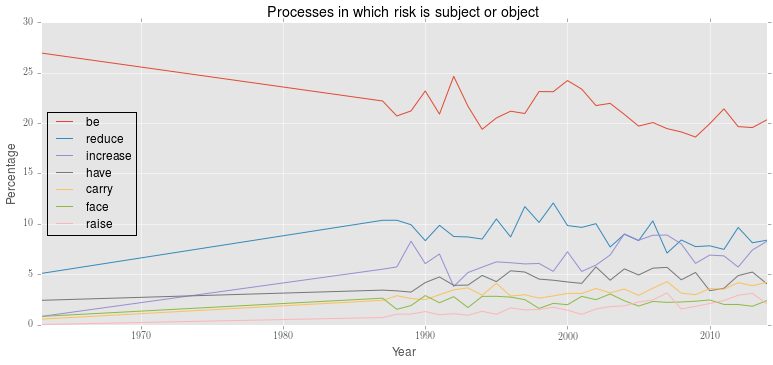

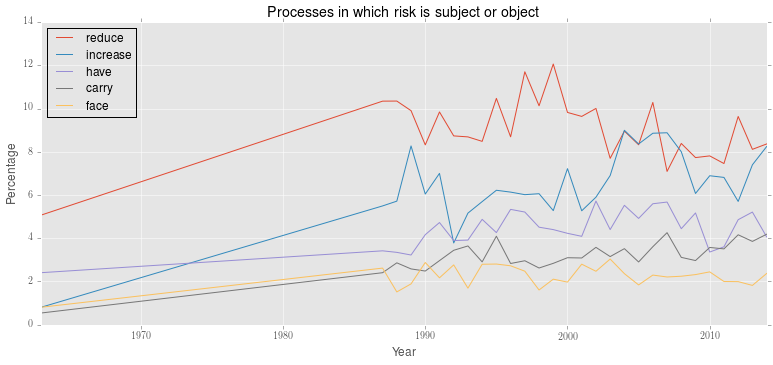

In [161]:
plotter('Processes in which risk is subject or object', editor(predicators.results, '%', predicators.totals).results, num_to_plot = 7)

# skip be
plotter('Processes in which risk is subject or object', editor(predicators.results, 
'%', predicators.totals, skip_entries = ['be']).results, num_to_plot = 5)

Interesting! 

### Risk as process

When *risk* is the main verb in a clause (e.g. *don't risk it*), it is the process. There are other kinds of risk processes, however: when risk occurs as the first object argument of certain nouns, it may be classified as a *process-range configuration* (an SFL term). Searching the data reveals four other main kinds of risk process:

1. *to take risk*
2. *to run risk*
3. *to put at risk*
4. *to pose a risk*

In these cases, the expression is more or less idiomatic, and the main verb carries little semantic weight ([Eggins, 2004](#ref:eggins)). 

We tracked the relative frequency of each construction over time.

In [154]:
query = ([u'risk', r'VP <<# (/VB.?/ < /(?i).?\brisk.?\b/)'], 
    [u'take risk', r'VP <<# (/VB.?/ < /(?i)\b(take|takes|taking|took|taken)+\b/) < (NP <<# /(?i).?\brisk.?\b/)'], 
    [u'run risk', r'VP <<# (/VB.?/ < /(?i)\b(run|runs|running|ran)+\b/) < (NP <<# /(?i).?\brisk.?\b/)'], 
    [u'put at risk', r'VP <<# /(?i)(put|puts|putting)\b/ << (PP <<# /(?i)at/ < (NP <<# /(?i).?\brisk.?/))'], 
    [u'pose risk', r'VP <<# (/VB.?/ < /(?i)\b(pose|poses|posed|posing)+\b/) < (NP <<# /(?i).?\brisk.?\b/)'])
processes = multiquery(annual_trees, query)

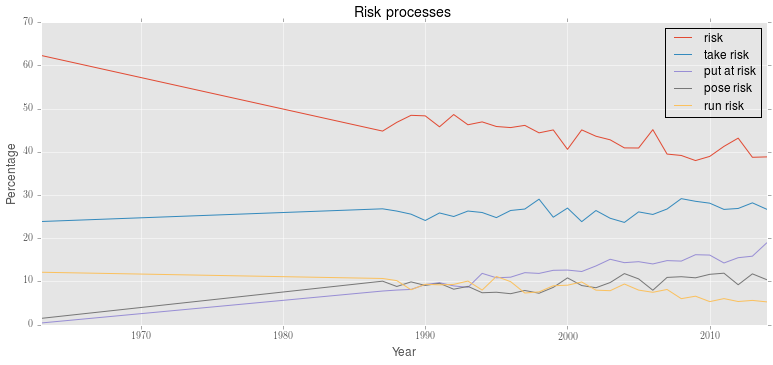

In [162]:
proc_rel = editor(processes.results, '%', processes.totals)
plotter('Risk processes', proc_rel.results)

Subordinate processes are often embedded within clauses containing a risk predicator, as in *Obama risks alienating voters*.

In [155]:
# to risk losing/being/having etc

query = r'VBG >># (VP > (S > (VP <<# (/VB.?/ < /(?i).?\brisk.?/))))'
risk_verbing = interrogator(annual_trees, 'words', query)

 21:46:05: Finished! 966 unique results, 13906 total.


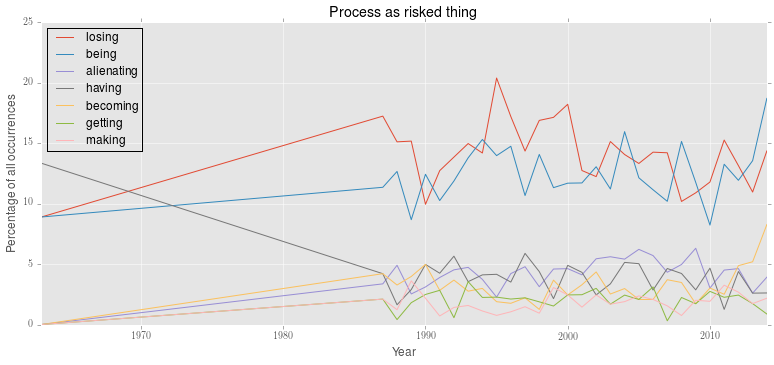

In [163]:
r_verbing = editor(risk_verbing.results, '%', risk_verbing.totals)
plotter('Process as risked thing', r_verbing.results, y_label = 'Percentage of all occurrences', 
    num_to_plot = 7)

In this kind of risk process, the risker is typically a powerful member of society. While this is rather explicit in some cases (it's hard to image that a mechanic would risk alienating his\slash her apprentice), we can observe that this is the case for less obvious examples, like *to risk becoming*:

In [166]:
lines = conc('data/nyt/years/2013', r'VBG < /(?i)becom/ >># (VP > (S > (VP <<# (/VB.?/ < /(?i).?\brisk.?/))))', n = 15, random = True)


23:21:50: Getting concordances for data/nyt/years/2013 ... 
          Query: VBG < /(?i)becom/ >># (VP > (S > (VP <<# (/VB.?/ < /(?i).?\brisk.?/))))



ValueError: sample larger than population

### Subjects of risk processes

In [168]:
query = r'/NN.?/ !< /(?i).?\brisk.?/ >># (@NP $ (VP <+(VP) (VP ( <<# (/VB.?/ < /(?i).?\brisk.?/) | <<# (/VB.?/ < /(?i)(take|taking|takes|taken|took|run|running|runs|ran|put|putting|puts|pose|poses|posed|posing)/) < (NP <<# (/NN.?/ < /(?i).?\brisk.?/))))))'
subj_of_risk_process = interrogator(annual_trees, 'words', query, lemmatise = True)

 23:33:32: Finished! 2491 unique results, 10049 total.


### Objects of risk processes

We can locate the most common objects of risk processes:

In [156]:
# Objects of risk processes
query = r'/NN.?/ >># (NP > (VP <<# (/VB.?/ < /(?i).?\brisk.?/)))'
risk_objects = interrogator(annual_trees, 'words', query, 
    lemmatise = True, titlefilter = False)

 21:55:36: Finished! 2226 unique results, 22599 total.


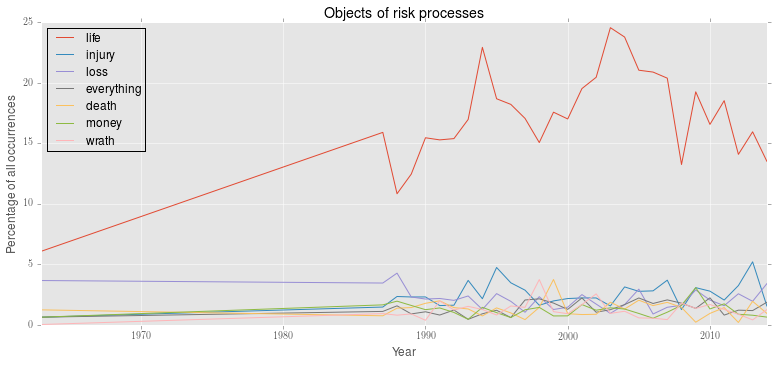

In [169]:
plotter('Objects of risk processes', editor(risk_objects.results, 
    '%', risk_objects.totals).results, y_label = 'Percentage of all occurrences')

Notice that both the `potential harm* and *risked things* can fit in this position. We can view the most common results and create new lists for risked things/potential harms with *surgeon()`.

In [171]:
quickview(risk_objects, n = 100)

  0: life (n=4053)
  1: injury (n=578)
  2: loss (n=453)
  3: everything (n=323)
  4: death (n=292)
  5: money (n=280)
  6: wrath (n=269)
  7: health (n=266)
  8: arrest (n=257)
  9: career (n=255)
 10: damage (n=240)
 11: war (n=239)
 12: reputation (n=223)
 13: fine (n=219)
 14: capital (n=188)
 15: backlash (n=156)
 16: future (n=153)
 17: safety (n=137)
 18: confrontation (n=137)
 19: job (n=134)
 20: failure (n=134)
 21: penalty (n=126)
 22: prosecution (n=121)
 23: embarrassment (n=110)
 24: criticism (n=106)
 25: ire (n=97)
 26: possibility (n=93)
 27: anything (n=92)
 28: collapse (n=87)
 29: harm (n=83)
 30: crisis (n=83)
 31: return (n=83)
 32: inflation (n=81)
 33: attack (n=79)
 34: defeat (n=78)
 35: charge (n=77)
 36: sanction (n=74)
 37: credibility (n=72)
 38: neck (n=72)
 39: default (n=71)
 40: problem (n=69)
 41: casualty (n=67)
 42: kind (n=66)
 43: exposure (n=64)
 44: lot (n=64)
 45: chance (n=64)
 46: management (n=64)
 47: conflict (n=64)
 48: consequence (n=63)

Skipping 16 entries:
    life
    everything
    money
    health
    career
    reputation
    capital
    future
    safety
    job
    possibility
    anything
    return
    neck
    lot
    nothing


Keeping 16 entries:
    life
    everything
    money
    health
    career
    reputation
    capital
    future
    safety
    job
    possibility
    anything
    return
    neck
    lot
    nothing




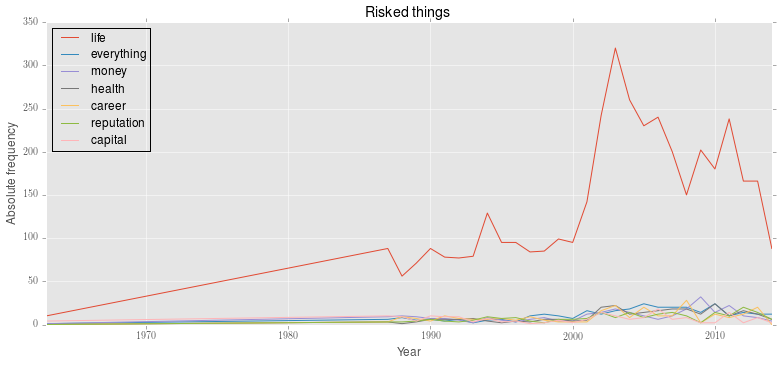

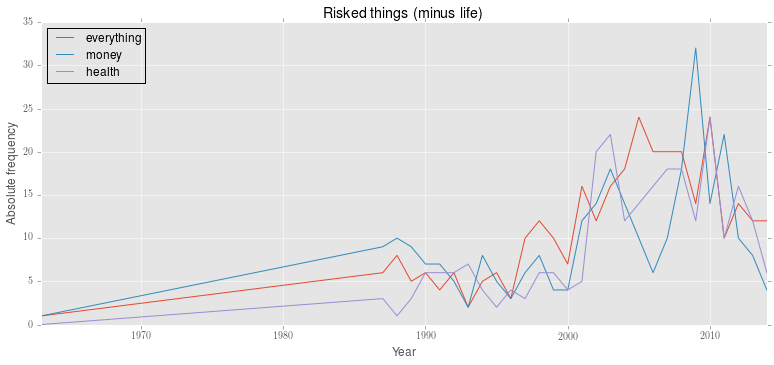

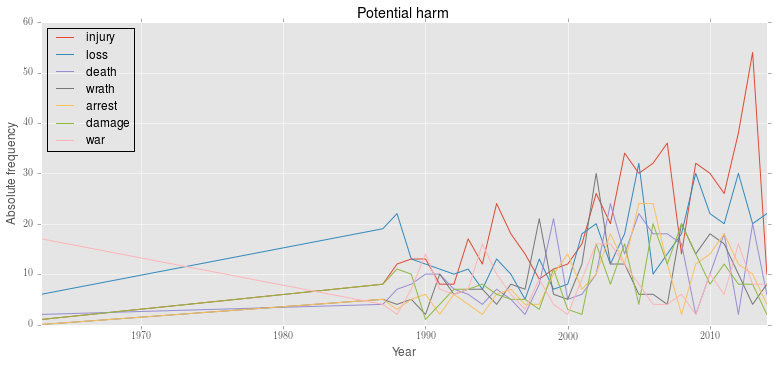

In [173]:
riskobject_regex = (r'(?i)^\b(life|everything|money|career|health|reputation|capital|future|'
    r'job|safety|possibility|anything|return|neck|nothing|lot)$\b')
riskedthings = editor(risk_objects.results, skip_entries = riskobject_regex)
potentialharm = editor(risk_objects.results, just_entries = riskobject_regex)
plotter('Risked things', potentialharm.results, num_to_plot = 7)
plotter('Risked things (minus life)', potentialharm.results.drop('life', axis = 1), num_to_plot = 3)
plotter('Potential harm', riskedthings.results, num_to_plot = 7)

It's interesting how powerful people risk losing and alienating electorates, fanbases or contracts, while less powerful people risk their jobs and safety, or their life or neck.

### Risk as modifier

Risk words can serve as modifiers in a number of ways. We divided risk as modifier into five main types.

| Modifier type | Example  |
|---|---|
| Adjectival modifiers of participants  |  *the riskiest decision* | 
| Pre-head nominal modifiers of participants  |  *risk management* | 
|  Post-head nominal modifiers of participants |  *the money to risk* | 
| Adverbial modifiers of processes  |  *it riskily moved* | 
| As head of NP that is head of a cirumstance  | *she was at risk*  | 

In [157]:
query = ([u'Adjectival modifier', r'/NN.?/ >># (NP < (/JJ.?/ < /(?i).?\brisk.?/))'],
    [u'Pre-head nominal modifier', r'/NN.?/ < /(?i).?\brisk.?/ $ (/NN.?/ >># NP !> CC)'], 
    [u'Post-head modifier', r'/NN.?/ >># (NP < (PP < (NP <<# /(?i).?\brisk.?/)))'], 
    [u'Adverbial modifier', r'RB < /(?i).?\brisk.?/'],
    [u'Circumstance head', r'/NN.?/ < /(?i).?\brisk.?/ >># (NP > (PP > (VP > /\b(S|SBAR|ROOT)\b/)))'])
modifiers = multiquery(annual_trees, query)

Skipping 1 subcorpora:
    1963




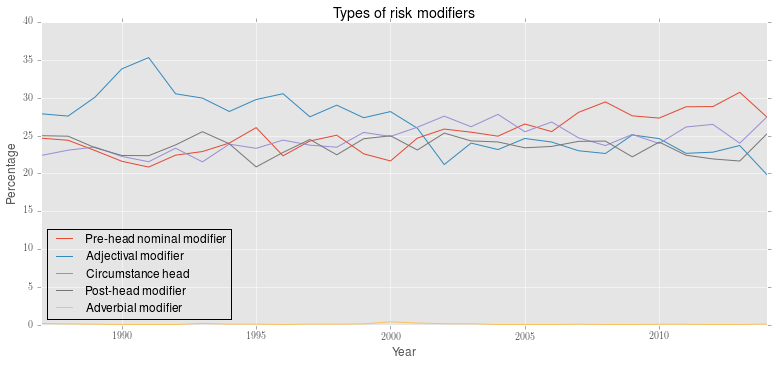

In [175]:
plotter('Types of risk modifiers', editor(modifiers.results, '%', modifiers.totals, skip_subcorpora = [1963]).results)

We pulled out the most common nouns modified by adjectival risk:

In [158]:
# Participants modified by risk word
query = r'/NN.?/ >># (NP < (/JJ.?/ < /(?i).?\brisk.?/) ( > VP | $ VP))'
mod_by_adj_risk = interrogator(annual_trees, 'words', query, 
    lemmatise = True, titlefilter = False)

 22:51:40: Finished! 897 unique results, 8705 total.


ERROR! Session/line number was not unique in database. History logging moved to new session 978


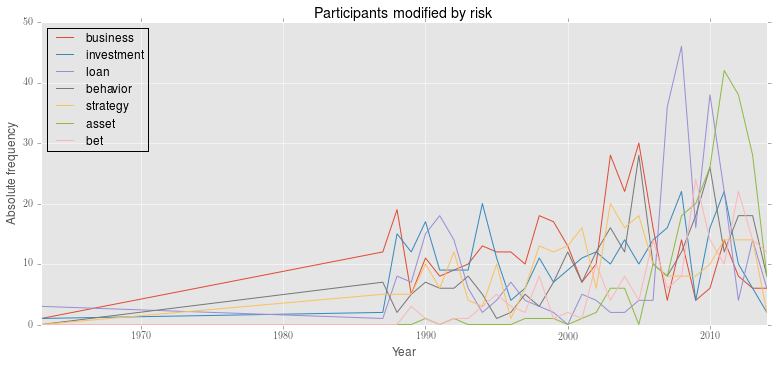

In [177]:
plotter('Participants modified by risk', mod_by_adj_risk.results, 
    num_to_plot = 7)

In [ ]:
plotter('Participants modified by risk', editor(mod_by_adj_risk.results,
             just_totals = True).results, kind = 'bar', num_to_plot = 7)

We looked at the most common adjectival risks:

In [159]:
query = r'/JJ.?/ < /(?i).?\brisk.?/'
adjrisks = interrogator(annual_trees, 'words', query, 
    lemmatise = False)

 23:00:58: Finished! 355 unique results, 45604 total.


In [ ]:
arisk = editor(adjrisks.results, '%', allwords.totals) 

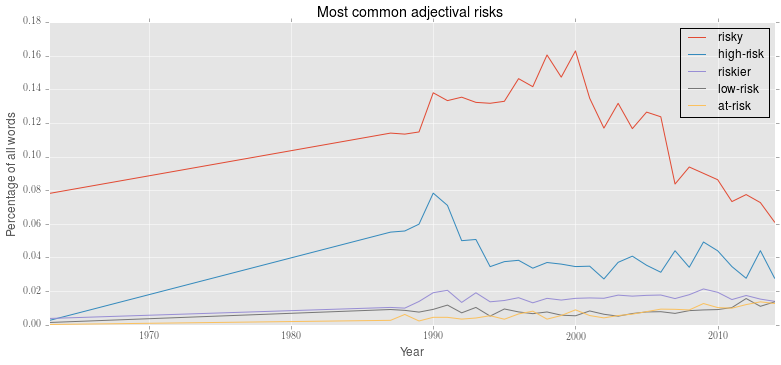

In [181]:
# remember that we can still plot using all words/all risk words 
plotter('Most common adjectival risks', arisk.results, y_label = 'Percentage of all words', num_to_plot = 5)

Given the increasing frequency of at-risk constructions, we then looked at what it is that this modifier typically modifies.

In [160]:
# At-risk thing
query = r'/NN.?/ >># (NP < (/JJ.?/ < /(?i).?\bat-risk/) ( > VP | $ VP))'
at_risk_things = interrogator(annual_trees, 'words', query, 
    lemmatise = True)

 23:10:56: Finished! 61 unique results, 377 total.


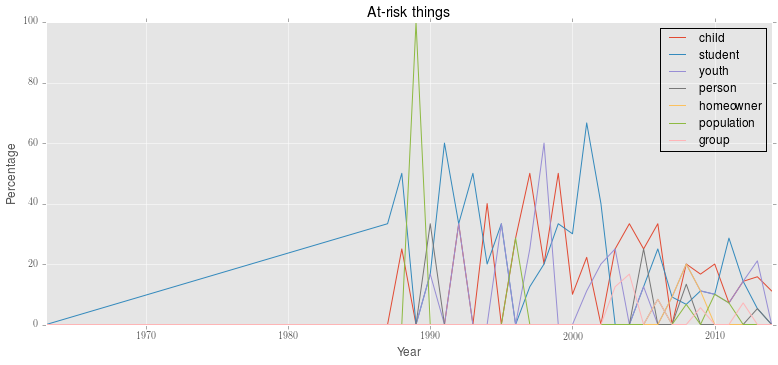

In [182]:
plotter('At-risk things', editor(at_risk_things.results, 
    '%', at_risk_things.totals).results)

The chart below counts both *thing at risk* and *at-risk thing*.

In [ ]:
# at-risk person / person at risk combined
query = r'/NN.?/ ( >># (NP < (PP <<# /(?i)at/ << (NP <<# /(?i)\brisk.?/))) | ( >># (NP < (/JJ.?/ < /(?i)at-risk.?/))))'
n_atrisk_n = interrogator(annual_trees, 'words', query, 
    lemmatise = False, titlefilter = False)

In [ ]:
plotter('At-risk thing or thing at risk', n_atrisk_n.results, num_to_plot = 7)

Vulnerable human populations are the main theme of this category: indeed, it's difficult to imagine *at-risk corporations* or *at-risk leaders*.

### Proper nouns and risk sentences

We searched to find the most common proper noun strings.

`interrogator()`'s *titlefilter* option removes common titles, first names and determiners to make for more accurate counts. It is useful when the results being returned are groups/phrases, rather than single words.

In [ ]:
# Most common proper noun phrases
query = r'NP <# NNP >> (ROOT << /(?i).?\brisk.?\b/)'
propernouns = interrogator(annual_trees, 'words', query, 
    titlefilter = True)

In [ ]:
plotter('Most common proper noun phrases', propernouns.results, '%', propernouns.totals)

In [ ]:
quickview(propernouns.results, n = 200)

Notice that there are a few entries here that refer to the same group. (f.d.a and food and drug administration, for example). We can use `merger()` to fix these.

In [ ]:
# indices change after merger, remember, so
# make sure you quickview results after every merge.
merged_propernouns = merger(propernouns.results, [13, 21])
merged_propernouns = merger(merged_propernouns, [9, 29])
merged_propernouns = merger(merged_propernouns, [44, 109])
merged_propernouns = merger(merged_propernouns, [61, 112])
merged_propernouns = merger(merged_propernouns, [186, 199])
merged_propernouns = merger(merged_propernouns, [65, 130])
merged_propernouns = merger(merged_propernouns, [85, 152], newname = 152)
merged_propernouns = merger(merged_propernouns, [23, 132])
quickview(merged_propernouns, n = 200)

Now that we've merged some common results, we can use `surgeon()` to build some basic thematic categories.

In [ ]:
# make some new thematic lists
# make some new thematic lists
people = surgeon(merged_propernouns, r'(?i)^\b(bush|clinton|obama|greenspan|gore|johnson|mccain|romney|kennedy|giuliani|reagan)$\b')
nations = surgeon(merged_propernouns, r'(?i)^\b(iraq|china|america|israel|russia|japan|frace|germany|iran|britain|u\.s\.|afghanistan|australia|canada|spain|mexico|pakistan|soviet union|india)$\b')
geopol = surgeon(merged_propernouns, r'(?i)^\b(middle east|asia|europe|america|soviet union|european union)$\b')
usplaces = surgeon(merged_propernouns, r'(?i)^\b(new york|washington|wall street|california|manhattan|new york city|new jersey|north korea|italy|greece|bosniaboston|los angeles|broadway|texas)$\b')
companies = surgeon(merged_propernouns, r'(?i)^\b(merck|avandia|citigroup|pfizer|bayer|enron|apple|microsoft|empire)$\b')
organisations = surgeon(merged_propernouns, r'(?i)^\b(white house|congress|federal reserve|nasa|pentagon|f\.d\.a \.|c\.i\.a \.|f\.b\.i \.|e\.p\.a \.)$')
medical = surgeon(merged_propernouns, r'(?i)^\b(vioxx|aids|aid|celebrex|f\.d\.a \.|pfizer|bayer|merck|avandia)$')
#balkan = surgeon(merged_propernouns, r'(?i)^(balkan|yugoslav|milos|serbia|croatia|bosnia|kosovo|nato)$')
# geopol[5][0] == u'e.u.'

In [ ]:
# plot some results
plotter('People', people, '%', propernouns.totals, 
        y_label = 'Percentage of all proper noun groups')

plotter('Nations', nations, '%', propernouns.totals, 
        y_label = 'Percentage of all proper noun groups')

plotter('Geopolitical entities', geopol, '%', propernouns.totals,  
        y_label = 'Percentage of all proper noun groups')

plotter('Companies', companies, '%', propernouns.totals, 
        y_label = 'Percentage of all proper noun groups')

plotter('Organisations', organisations, '%', propernouns.totals, 
        y_label = 'Percentage of all proper noun groups')

plotter('Medicine', medical, '%', propernouns.totals, num_to_plot = 4,
        y_label = 'Percentage of all proper noun groups', save = True, figsize = 15)

plotter('Balkan Wars', balkan, num_to_plot = 12,
        y_label = 'Absolute frequency', yearspan = [1989, 2001])

In [ ]:
them_comp = [people.totals, nations.totals, geopol.totals, usplaces.totals, companies.totals, organisations.totals, medical.totals]
them_comp[0][0] = u'People'
them_comp[1][0] = u'Nations'
them_comp[2][0] = u'Geopolitical entities'
them_comp[3][0] = u'US places'
them_comp[4][0] = u'Companies'
them_comp[5][0] = u'Organisations'
them_comp[6][0] = u'Health-related terms'
plotter('Themes', them_comp, '%', propernouns.totals)

These charts reveal some interesting patterns.

* We can clearly see presidencies and rival candidates come and go
* Similarly, the wars in Iraq and Afghanistan are easy to spot
* Naturally, the Soviet Union is a very frequent topic in 1963. It rises in frequency until its collapse. More recently, Russia can be seen as more frequently co-occurring with risk words.
* The Eurozone crisis is visible
* From the Organisations and Things, we can see the appearance of Merck and Vioxx in 2004, as well as Empire...

In [ ]:
vioxx = surgeon(propernouns.results, r'(?i)^\b(vioxx|merck)\b$')
plotter('Merck and Vioxx', vioxx, '%', propernouns.totals)
plotter('Merck and Vioxx', vioxx, '%', propernouns.totals, yearspan = [1998,2012])

Vioxx was removed from shelves following the discovery that it increased the risk of heart attack. It's interesting how even though terrorism and war may come to mind when thinking of *risk* in the past 15 years, this health topic is easily more prominent in the data.

### Arguability

In terms of interpersonal meanings, we were interested in the *arguability* of risk: that is, the extent to which risk words are a core or peripheral part of the meaning being negotiated by writer and reader.

In SFL, arguability is related to the mood system. Certain roles within the mood of a clause are more arguable than others. In a hypothetical exchange, we can see that certain parts of the proposition can be easily questioned:

     A: I think Kim was heading over to the little pub on the corner.
     B1: Was he?

The two grammatical roles being restated here are the Subject (*he*) and the Finite (*was*). These are the two most arguable roles in which a risk word could appear.

If the speaker wanted to argue about the size of the pub, simple replies seem almost like *non sequiturs*:

     A: I think Kim was heading over to the little pub on the corner.
     B: It's not that little!

Note how even in this stylistically marked example, B turns the pub and its nature into the Subject and Finite, in order to make it the main area of contention within the conversation.

Using SFL's description of the mood system as a guide, we constructed a basic (i.e. simplified) scale of arguability.

| Role in the mood system | Arguability |
| ----------------------- | ----------- |
| Subject                 | Very high   |
| Finite                  | High        |
| Predicator                  | Medium        |
| Complement              | Low      |
| Adjunct                 | Very low         |

### Arguability of risk

We were interested in whether there are any longitudinal changes in the proportion of risk words in each mood role. 

For this, rather than interrogating phrase-structure parses, we needed to interrogate dependency parses, which provide basic information about the functional role of a word in a clause. By default, the parser we used (Stanford CoreNLP) outputs three different dependency grammars. Any of the three can be selected for analysis.

`interrogator()` can also work with the dependency parses provided by CoreNLP. To do this, we use some different arguments. Though the first argument is still a path to the corpus, instead of a Tregex query, we use a regular expression. Instead of 'count', 'words', 'pos' or 'both', we use:

* `funct`: find the functional role of words matching the regular expression
* `gov`: find the functional role of words matching the regular expression, as well as the word on which the match is dependent.
* `number`: find the 'index' of words matching the regular expression.

There is also an optional argument:

* `dep_type`: the kind of dependencies parses we want to search: *'basic-dependencies'*, '*collapsed-dependencies'*, or *'collapsed-ccprocessed-dependencies'*.

You can still use the `lemmatise` option, though it will only do something if you're working with the `gov` option.



We were interested in each of these three kinds of dependency information.

With regard to (4): though the *collapsed-cc-dependencies* are perhaps the most commonly used, we use basic dependencies here, as this assisted the lemmatisation process (see the report for more information).

### Functional role of risk in dependency parses

In [ ]:
# set path to dependency parses
annual_deps = 'data/nyt/basic-dependencies/years'

In [ ]:
risk_functions = interrogator(annual_deps, 'funct', r'(?i)\brisk', dep_type = 'basic-dependencies')

In [ ]:
plotter('Top functions of risk words', risk_functions.results, '%', risk_functions.totals)

We can divide these functions into experiential categories of Participant, Process and Modifier

In [ ]:
merged = merger(risk_functions.results, [1, 2, 10, 18, 17, 20, 24], newname = 'Participant')
merged = merger(merged.results, [5, 6, 7, 11, 20, 22], newname = 'Process')
merged = merger(merged.results, [1, 4, 5, 8, 9, 12, 13, 14, 17], newname = 'Modifier')

merging = merger(risk_functions.results, r'^(dobj|nsubj|nsubjpass|csubj|acomp|iobj|csubjpass)$', newname = 'Participant')
merged = merger(merged.results, r'^(root|ccomp|xcomp|pcomp|auxpass|aux)$', newname = 'Process')
merged = merger(merged.results, [1, 4, 5, 8, 9, 12, 13, 14, 17], newname = 'Modifier')

We can also use this information to determine whether risk is more commonly the experiential subject or object:

In [ ]:
subjobj = editor(risk_functions.results, just_entries = r'^(nsubj|(d|i)obj)')
subjobj = editor(subjobj.results, merge_entries = r'', newname = 'Experiential subject')
subjobj = editor(subjobj.results, merge_entries = r'', newname = 'Experiential object')
mergesub = merger(subjobj, [0, 2, 3], newname = 'Experiential object')
mergesub[1][0] = 'Experiential subject'

We can also merge results into the categories of Subject, Finite/Predicator, Complement and Adjunct:

In [ ]:
quickview(risk_functions.results, n = 30)
# quickview(merged_role, n = 30)

In [ ]:
# run the first part, uncomment above, check, repeat ...
merged_role = merger(risk_functions.results, [2, 10, 18, 24], newname = 'Subject') # add csubj
#quickview(merged_role)
merged_role = merger(merged_role, [6, 22, 23], newname = 'Finite/Predicator')
merged_role = merger(merged_role, [1, 16, 18, 20], newname = 'Complement')
merged_role = merger(merged_role, [0, 3, 5, 10, 13, 16, 20], newname = 'Adjunct')

In [ ]:
# remove all other items
merged_role = surgeon(merged_role, [0, 1, 2, 4], remove = False)

In [ ]:
# resort this list:
from operator import itemgetter # for more complex sorting
to_reorder = list(merged_role)
mr_sorted = sorted(list(merged_role), key=itemgetter(1), reverse = True)

In [ ]:
plotter('Functional role using dependency parses', merged_role, '%', risk_functions.totals)

### Role and governor of risk

In [ ]:
role_and_gov = interrogator(annual_deps, 'gov', r'(?i)\brisk', dep_type = 'basic-dependencies', lemmatise = True)

In [ ]:
plotter('Governors of risk and their roles', role_and_gov.results, '%', role_and_gov.totals)

We can post-process this list in a couple of interesting ways:

### Dependency index

In a dependency parse, smaller indices will be given to words close to the root of the dependency string. These correspond (roughly) with more arguable roles in SFL. Large indices are more dependent, and are generally less arguable.

Thus, we also thought we could roughly approximate arguability by looking for the index of each risk word within each dependency parse.

In [ ]:
risk_indices = interrogator(annual_deps, 'number', r'(?i)\brisk', dep_type = 'basic-dependencies')

Our existing way of plotting results needed to be modified in order to show the information provided by the `number` search.

**in progress, sorry...**

### Risk in economics, health and politics articles

We used article metadata features in the NYT annotated corpus to build corpora of economics, health and politics articles.

> No metadata was available for 1963 editions, and thus they are not plotted in this section.

Before interrogating topic subcorpora, we built `topix_search()` and `topix_plot()`. These are short functions to interrogate and plot each subcorpus in turn. They have been automatically loaded in with interrogators.ipy in the first cell.

In [ ]:
# get a list of the economics, health and politics subcorpora
trees = 'data/nyt/trees'
topic_trees = [d for d in os.listdir(trees)
          if os.path.isdir(os.path.join(path,d))
          and d != 'years']

It's useful to keep in mind that `conc()` can loop through subcorpora. Two kinds of loops are presented below.

In [ ]:
import pprint # nice looking results
year_of_interest = '2002'
for topic in topic_trees:
    lines = conc(os.path.join(trees,topic,year_of_interest), 
        r'PP < (NP <# (/NN.?/ < /(?i).?\brisk.?\b/))', n = 15, random = True)
    for line in lines:
        print line

In [ ]:
topic = 'economics'
# note that years here are strings (in quotation marks), rather than integers.
years = ['1989', '1990', '1991']
for year in years:
    lines = conc(os.path.join(trees,topic,year), r'/(?i)risky/', n = 15, random = True, window = 50)
    #print lines

### Proper noun phrases

In [ ]:
query = r'NP <# NNP >> (ROOT << /(?i).?\brisk.?\b/)'
topics_propernouns = topix_search(topic_trees, 'words', query, titlefilter = True)

When working with topic subcorpora, you can add an extra argument to `quickview()` to see the first results from each subcorpus:

In [ ]:
quickview(topics_propernouns, n = 20, topics = True)

In [ ]:
topix_plot('Proper noun phrases', topics_propernouns)

In [ ]:
# people in politics articles
# note, we just use `interrogator()` and `plotter()`, because we're only interested in a single topic subcorpus.
query = r'NP <# NNP >> (ROOT << /(?i).?\brisk.?\b/)'
propnounphrases = interrogator('nyt/politics', 'words', query, titlefilter = True)

In [ ]:
polpeople = surgeon(propnounphrases.results, 
    r'(?i)\b(obama|bush|clinton|dole|romney|reagan|carter|ford|mccain|johnson|kennedy|gore)\b', 
  )
#topix_plot('Proper noun phrases', results)
plotter('Politicians in sentences containing a risk word', polpeople)

### Adjectives modifying participant risk

In [ ]:
query = r'/JJ.?/ > (NP <<# /(?i).?\brisk.?/ ( > VP | $ VP))'
topics_adjmod = topix_search(topic_trees, 'words', query)
    

In [ ]:
topix_plot('Adjectives modifying participant risk', topics_adjmod)

### Risk of (noun)

In [ ]:
query = r'/NN.?/ >># (NP > (PP <<# /(?i)of/ > (NP <<# (/NN.?/ < /(?i).?\brisk.?/))))'
topics_riskof = topix_search(topic_trees, 'words', query)

In [ ]:
topix_plot('Risk of (noun)', topics_riskof)

### Arguability in topic subcorpora

We can also look for arguability information using dependency-parsed versions of our topic subcorpora.

### General queries

We also performed some basic querying of all parsed data. Though not discussed in our report, these findings may be interesting in their own right.

In the examples below, we use *multiplier = 1*. This is for making ratios.

In [ ]:
openwords = r'/\b(JJ|NN|VB|RB)+.?\b/'
clauses = r'S < __'
opencount = interrogator(annual_trees, 'count', openwords)
clausecount = interrogator(annual_trees, 'count', clauses)

In [ ]:
# ratio of open to closed word classes
# already done this one:

# openwords = r'/\b(JJ|NN|VB|RB)+.?\b/'
# opencount = interrogator(annual_trees, 'count', openwords)

closedwords = r'/\b(DT|IN|CC|EX|W|MD|TO|PRP)+.?\b/'
closedcount = interrogator(annual_trees, 'count', closedwords)

In [ ]:
# ratio of nouns/verbs
nounquery = r'/NN.?/ < __'
verbquery = r'/VB.?/ < __'
nouncount = interrogator(annual_trees, 'count', nounquery)
verbcount = interrogator(annual_trees, 'count', verbquery)

... and finally, plot the results:

In [ ]:
#plot results
plotter('Lexical density', opencount.totals, '%', clausecount.totals, 
            y_label = 'Lexical Density Score', multiplier = 1)

plotter('Open/closed word classes', opencount.totals, '%', closedcount.totals, 
            y_label = 'Open/closed ratio', multiplier = 1)

plotter('Noun/verb ratio', nouncount.totals, '%', verbcount.totals, 
            y_label = 'Noun/verb ratio', multiplier = 1)

### General dependency queries

Our final area of investigation was general dependency. This is identical to our investigation of risk dependencies, excepyt that we change our token definition from any risk word to any word.

In [ ]:
all_functions = interrogator(annual_deps, 'funct', 
    r'(?i)[a-z0-9]', dep_type = 'basic-dependencies')

In [ ]:
plotter('Most common functional roles in parsed data', 
    all_functions.results, '%', all_functions.totals)

We could then merge results into the categories of Subject, Finite/Predicator, Complement and Adjunct:

In [ ]:
quickview(all_functions.results, n = 60)

In [ ]:
merged_role = merger(all_functions.results, [], newname = 'Subject')
merged_role = merger(merged_role, [], newname = 'Finite/Predicator')
merged_role = merger(merged_role, [], newname = 'Complement')
merged_role = merger(merged_role, [], newname = 'Adjunct')
# remove all other items
merged_role = surgeon(merged_role, [])

plotter('Functional role using dependency parses', merged_role, '%', all_functions.totals)

### Role and governor

In [ ]:
all_role_and_gov = interrogator(annual_deps, 'gov', r'(?i)[a-z0-9]', 
    dep_type = 'basic-dependencies', lemmatise = True)

In [ ]:
plotter('Most common dependencies for risk words', all_role_and_gov.results, 
    '%', all_role_and_gov.totals)

### Dependency index

We were interested in whether the changes in risk dependency indices were part of a more general trend.

In [ ]:
all_indices = interrogator(annual_deps, 'number', r'(?i)[a-z0-9]', dep_type = 'basic-dependencies')

Our existing way of plotting results needed to be modified in order to show the information provided by the *number* search.

In [ ]:
from operator import itemgetter # for more complex sorting
# make a new list to reorder
to_reorder = list(all_indices.results)
dep_num = sorted(to_reorder, key=itemgetter(0), reverse = True)

In [ ]:
plotter('Dependency indices for all words', sorted_indices, '%', all_indices.totals)

# Due to limitations in available computational resources, our investigation did not involve parsing the full collection of NYT articles: we only used paragraphs containing a risk word. Longitudinal changes in the examples above are interesting in their own right. We hope in a further project to be able to expand the size of our corpus dramatically in order to determine the causes of these more general changes.

### Discussion

### Limitations

A key challenge accounting for the diverse ways in which a semantic meaning can be made in lexis and grammar. If we are interested in how often *money* is the risked thing, we have to design searches that find: 

     She risked her money
     She risked losing her money
     Money was risked
     It was risked money
     The risk of money loss was there
     She took her money from her purse and risked it.

Though we can design queries to match any of these, it is very difficult to automate this process for every possible 'risked thing'. It's also very hard to know when we have finally developed a query that matches everything we want.

An added issue is how to treat things like:

     She didn't risk her money
     She risked no money
     She could risk money

Here, the semantic meanings are very different (the risking of money did not occur), but each would match the queries we designed for the above.

Should these results be counted or excluded? Why?

### References

<a id="eggins"></a>
Eggins, S. (2004). Introduction to systemic functional linguistics. Continuum International Publishing Group.

<a id="firth"></a>
Firth, J. (1957).  *A Synopsis of Linguistic Theory 1930-1955*. In: Studies in Linguistic Analysis, Philological Society, Oxford; reprinted in Palmer, F. (ed.) 1968 Selected Papers of J. R. Firth, Longman, Harlow.

<a id="hallmat"></a>
Halliday, M., & Matthiessen, C. (2004). An Introduction to Functional Grammar. Routledge.

# Work in progress

It's also possible to interrogate the corpus for keywords and/or ngrams:

In [ ]:
kwds = interrogator(annual_trees, 't', 'keywords', lemmatise = True)
ngms =  interrogator(annual_trees, 't', 'ngrams', lemmatise = True)

In [ ]:
ngms =  interrogator(annual_trees, 't', 'ngrams', lemmatise = True)

Let's sort these, based on those increasing/decreasing frequency:

Let's make some thematic categories by looping through the results with surgeon, and renaming 'Totals' to the name of the category. Be sure that later categories don't include earlier categories!

In [ ]:
regexes = [(r'\b(legislature|medicaid|republican|democrat|federal|council)\b', 'Government organisations'),
(r'\b(empire|merck|commerical)\b', 'Companies'),
(r'\b(athlete|policyholder|patient|yorkers|worker|infant|woman|man|child|children|individual|person)\b', 'People, everyday'),
(r'\b(marrow|blood|lung|ovarian|breast|heart|hormone|testosterone|estrogen|pregnancy|prostate|cardiovascular)\b', 'The body'),
(r'\b(reagan|clinton|obama|koch|slaney|starzl)\b', 'Specific people'),
(r'\b(implant|ect|procedure|abortion|radiation|hormone|vaccine|medication)\b', 'Treatment'),
(r'\b(addiction|medication|drug|statin|vioxx)\b', 'Drugs'),
(r'\b(addiction|coronary|aneurysm|mutation|injury|fracture|cholesterol|obesity|cardiovascular|seizure|suicide)\b', 'Symptom'),
(r'\b(worker|physician|doctor|midwife|dentist)\b', 'Healthcare professional'),
(r'\b(transmission|infected|hepatitis|virus|hiv|lung|aids|asbestos|malaria|rabies)\b', 'Infectious disease'),
(r'\b(huntington|lung|prostate|breast|heart|obesity)\b', 'Non-infectious disease'), 
(r'\b(policyholder|reinsurance|applicant|capitation|insured|insurer|insurance|uninsured)\b', 'Finance'),
(r'\b(experiment|council|journal|research|university|researcher|clinical)\b', 'Research')]

In [ ]:
themed_keys = []
for regex, name in regexes:
    tmp = surgeon(kwds.results, regex, remove = False)
    tmp.totals[0] = name
    themed_keys.append(tmp.totals)
# here, we are generating a totals branch
themed_keys = surgeon(themed_keys, r'.*', remove = False)

themed_ngrams = []
for regex, name in regexes:
    tmp = surgeon(ngms.results, regex, remove = False)
    tmp.totals[0] = name
    themed_ngrams.append(tmp.totals)
themed_ngrams = surgeon(themed_ngrams, r'.*', remove = False)

In [ ]:
# 

In [ ]:
inc_keys = resorter(themed_keys.results, sort_by = increase)
dec_keys = resorter(themed_keys.results, sort_by = decrease)

In [ ]:
inc_n = resorter(themed_ngms.results, sort_by = increase)
dec_n = resorter(themed_ngms.results, sort_by = decrease)

We used the following code to count the number of articles per topic:

import os
output = []
base = 'data/nyt/ts'
for d in os.listdir(base):
    datum = []
    datum.append(d.title())
    tot = 0
    for sub in os.listdir(os.path.join(base, d)):
        count = len(os.listdir(os.path.join(base, d, sub)))
        tot += count
        datum.append([int(sub), count])
    datum.append(['Total', tot])
    output.append(datum)

plotter('Number of articles in each subcorpus', output, y_label = 'Number of articles', legend_totals = True)

### Risker value

A novel thing we can do with our data is determine the amount of time a word occurs in a given role. We know that Bush, Clinton, woman, bank, and child are common nouns in the corpus, but we do not yet know what percentage of the time they are playing a specific role in the risk frame.

To determine what percentage of the time these words take the role of risker, we start by counting their occurrences as risker, and in the corpus as a whole:

In [ ]:
n_query = r'/NN.?/ !< /(?i).?\brisk.?/ >># NP'
noun_lemmata = interrogator(corpus, 'words', n_query, lemmatise = True)
query = r'/NN.?/ !< /(?i).?\brisk.?/ >># (@NP $ (VP <+(VP) (VP ( <<# (/VB.?/ < /(?i).?\brisk.?/) | <<# (/VB.?/ < /(?i)(take|taking|takes|taken|took|run|running|runs|ran)/) < (NP <<# (/NN.?/ < /(?i).?\brisk.?/))))))'
subj_of_risk_process = interrogator(corpus, 'words', query, lemmatise = True)

Then, we iterate through the riskers, and make a percentage based on their appearance in the corpus as a whole

In [ ]:
# where our output will go:
risker_percentages = {}
for entry in subj_of_risk_process.results:
    word = entry[0]
    subj_total = entry[-1][1]
    matching_entry = next(e for e in noun_lemmata.results if e[0] == word)
    matching_total = matching_entry[-1][1]
    perc = float(subj_total) * 100.0 / float(matching_total)
    risker_percentages[word] = perc
output = [(k, risker_percentages[k]) for k in sorted(risker_percentages, key=risker_percentages.get, reverse=True)]

The problem is that this ranks words that only appear once very highly. We should restrict our search to only those words over a certain threshold. Let's also turn it into a function:

In [ ]:
def percenter(small_list, big_list, threshold = 'relative', sort_by = 'most'):
    """figures out the percentage of times the word in big_list is in small_list"""
    # 'relative' will divide the total of all words in big list by 10,000
    # it seems to give sensible results. maybe there should be 'strict', etc. too
    if threshold == 'relative':
        totals = []
        for each_entry in big_list:
            totals.append(each_entry[-1][1])
        tot = sum(totals)
        threshold = tot / float(10000)
        print 'Using %d as threshold ... ' % threshold
    
    dictionary = {}
    for entry in small_list:
        # get word
        word = entry[0]
        # get total for word
        subj_total = entry[-1][1]
        # get entry in big_list
        matching_entry = next(e for e in big_list if e[0] == word)
        # get total from this entry
        matching_total = matching_entry[-1][1]
        # this if allows threshold to be zero with 'threshold = None/False'
        if threshold:
            if matching_total > threshold:
                perc = float(subj_total) * 100.0 / float(matching_total)
                dictionary[word] = perc
        else:
            perc = float(subj_total) * 100.0 / float(matching_total)
            dictionary[word] = perc
    # sort by most or leat percent
    if sort_by == 'most':
        return [(k, dictionary[k]) for k in sorted(dictionary, key=dictionary.get, reverse=True)]
    elif sort_by == 'least':
        return [(k, dictionary[k]) for k in sorted(dictionary, key=dictionary.get)]

### Health participants

In [ ]:
corpus = 'data/nyt/ts/health'
query = r'NP !<< /(?i).?\b(risk|mallet|topic-keys).?\b/ <# /NN.?/'
ns = interrogator(corpus, 'words', query, titlefilter = True, lemmatise = True)

In [ ]:
plotter('Nouns', ns.results, sort_by = 'increase', num_to_plot = 15)
plotter('Nouns', ns.results, sort_by = 'decrease', num_to_plot = 15)

In [ ]:
in_res = resorter(ns.results, sort_by = 'increase', revert_year=True)

de_res = resorter(ns.results, sort_by = 'decrease', revert_year=True)

quickview(in_res)